In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
import geopandas as gpd

In [249]:
# read distribution data
distribution_data = pd.read_csv('//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Distribution_2015-2024.csv',low_memory=False)
# filter distribution data
distribution_data = distribution_data[(distribution_data['time']<='2025')]
# create a date column
distribution_data['Date'] = pd.to_datetime(distribution_data['time']).dt.strftime('%Y-%m-%d')
# create a year column
distribution_data['Year'] = pd.to_datetime(distribution_data['time']).dt.year

In [250]:
distribution_data

,time,id,max_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index,median_max_fpi_2.0_tdd_fuels_index,p75_max_fpi_2.0_tdd_fuels_index,p90_max_fpi_2.0_tdd_fuels_index,p95_max_fpi_2.0_tdd_fuels_index,max_mean_fpi_2.0_tdd_fuels_index,mean_mean_fpi_2.0_tdd_fuels_index,...,p90_p90_lfpw_using_dew_point_depression,p95_p90_lfpw_using_dew_point_depression,max_p95_lfpw_using_dew_point_depression,mean_p95_lfpw_using_dew_point_depression,median_p95_lfpw_using_dew_point_depression,p75_p95_lfpw_using_dew_point_depression,p90_p95_lfpw_using_dew_point_depression,p95_p95_lfpw_using_dew_point_depression,Date,Year
0,2015-01-01T00:00:00-08:00,HI LINE,0.287345,0.265334,0.265383,0.282467,0.287048,0.287233,0.192295,0.172548,...,0.764036,0.807536,2.244251,0.959767,0.663448,1.358356,2.001346,2.175403,2015-01-01,2015
1,2015-01-02T00:00:00-08:00,HI LINE,0.298353,0.274315,0.271084,0.286612,0.293096,0.294020,0.186456,0.165580,...,0.613063,0.619841,0.740885,0.524927,0.526151,0.637662,0.713337,0.724252,2015-01-02,2015
2,2015-01-03T00:00:00-08:00,HI LINE,0.290336,0.267696,0.261288,0.276733,0.287329,0.287826,0.172443,0.156317,...,0.200463,0.208811,0.416588,0.193335,0.197823,0.211645,0.283680,0.372936,2015-01-03,2015
3,2015-01-04T00:00:00-08:00,HI LINE,0.288494,0.265099,0.266496,0.272691,0.286355,0.287156,0.159368,0.146211,...,1.748444,1.825284,2.603175,0.829329,0.401402,1.031231,2.363874,2.576631,2015-01-04,2015
4,2015-01-05T00:00:00-08:00,HI LINE,0.331302,0.306010,0.312253,0.319900,0.329338,0.330632,0.183952,0.169220,...,2.876004,2.997994,3.685559,2.433482,2.552127,2.876201,3.339849,3.381666,2015-01-05,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382138,2024-12-27T00:00:00-08:00,STROSNIDER,0.356850,0.306157,0.294632,0.319434,0.354444,0.356225,0.316661,0.266713,...,10.377188,11.190470,11.296192,4.341035,3.299156,5.012625,10.377188,11.190470,2024-12-27,2024
14382139,2024-12-28T00:00:00-08:00,STROSNIDER,0.318490,0.286921,0.281609,0.287351,0.315855,0.318211,0.284863,0.251467,...,5.885743,6.253679,6.687046,3.373338,3.179719,4.097660,5.885743,6.253679,2024-12-28,2024
14382140,2024-12-29T00:00:00-08:00,STROSNIDER,0.303039,0.277896,0.284506,0.290719,0.294680,0.295246,0.271280,0.247216,...,7.282709,8.666787,9.183432,4.572004,4.422780,5.253398,7.282709,8.666787,2024-12-29,2024
14382141,2024-12-30T00:00:00-08:00,STROSNIDER,0.342299,0.304461,0.297286,0.328365,0.339061,0.341265,0.316545,0.273253,...,2.859010,3.464509,3.847372,1.315146,0.887706,2.266536,2.859010,3.464509,2024-12-30,2024


In [251]:
# read circuit lengths
circuitlengths = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Q1_2025-_HFRA_Conductor_SumStat_Circuit.xlsx")
# filter for OH only
circuitlengths = circuitlengths[circuitlengths['Conductor Type'].str.contains('OH',na=False)]
# filter for HFRA only
circuitlengths = circuitlengths[circuitlengths['HFRA Tier'].notna()]
# remove blank circuits
circuitlengths = circuitlengths[circuitlengths['Circuit Name'].notna()]
# capitalize circuit names
circuitlengths['Circuit Name'] = circuitlengths['Circuit Name'].str.upper()
circuitlengths_map = circuitlengths.groupby(['Circuit Name','Circuit FLOC'])['Circuit Miles'].sum().reset_index()
# get Circuit FLOC 
circuitlengths_map

,Circuit Name,Circuit FLOC,Circuit Miles
0,ABACUS,ED-00005,1.592161
1,ABRAHAM,ED-00024,1.204734
2,ACADEMY,ED-00045,14.998395
3,ACADIAN,ED-00032,3.743688
4,ACAPULCO,ED-00041,5.780607
...,...,...,...
1614,ZEVO,ED-19826,0.061934
1615,ZINC,ED-19890,7.881998
1616,ZIRCON,ED-19835,0.519011
1617,ZONE,ED-19850,44.549072


In [252]:
distribution_data

,time,id,max_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index,median_max_fpi_2.0_tdd_fuels_index,p75_max_fpi_2.0_tdd_fuels_index,p90_max_fpi_2.0_tdd_fuels_index,p95_max_fpi_2.0_tdd_fuels_index,max_mean_fpi_2.0_tdd_fuels_index,mean_mean_fpi_2.0_tdd_fuels_index,...,p90_p90_lfpw_using_dew_point_depression,p95_p90_lfpw_using_dew_point_depression,max_p95_lfpw_using_dew_point_depression,mean_p95_lfpw_using_dew_point_depression,median_p95_lfpw_using_dew_point_depression,p75_p95_lfpw_using_dew_point_depression,p90_p95_lfpw_using_dew_point_depression,p95_p95_lfpw_using_dew_point_depression,Date,Year
0,2015-01-01T00:00:00-08:00,HI LINE,0.287345,0.265334,0.265383,0.282467,0.287048,0.287233,0.192295,0.172548,...,0.764036,0.807536,2.244251,0.959767,0.663448,1.358356,2.001346,2.175403,2015-01-01,2015
1,2015-01-02T00:00:00-08:00,HI LINE,0.298353,0.274315,0.271084,0.286612,0.293096,0.294020,0.186456,0.165580,...,0.613063,0.619841,0.740885,0.524927,0.526151,0.637662,0.713337,0.724252,2015-01-02,2015
2,2015-01-03T00:00:00-08:00,HI LINE,0.290336,0.267696,0.261288,0.276733,0.287329,0.287826,0.172443,0.156317,...,0.200463,0.208811,0.416588,0.193335,0.197823,0.211645,0.283680,0.372936,2015-01-03,2015
3,2015-01-04T00:00:00-08:00,HI LINE,0.288494,0.265099,0.266496,0.272691,0.286355,0.287156,0.159368,0.146211,...,1.748444,1.825284,2.603175,0.829329,0.401402,1.031231,2.363874,2.576631,2015-01-04,2015
4,2015-01-05T00:00:00-08:00,HI LINE,0.331302,0.306010,0.312253,0.319900,0.329338,0.330632,0.183952,0.169220,...,2.876004,2.997994,3.685559,2.433482,2.552127,2.876201,3.339849,3.381666,2015-01-05,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382138,2024-12-27T00:00:00-08:00,STROSNIDER,0.356850,0.306157,0.294632,0.319434,0.354444,0.356225,0.316661,0.266713,...,10.377188,11.190470,11.296192,4.341035,3.299156,5.012625,10.377188,11.190470,2024-12-27,2024
14382139,2024-12-28T00:00:00-08:00,STROSNIDER,0.318490,0.286921,0.281609,0.287351,0.315855,0.318211,0.284863,0.251467,...,5.885743,6.253679,6.687046,3.373338,3.179719,4.097660,5.885743,6.253679,2024-12-28,2024
14382140,2024-12-29T00:00:00-08:00,STROSNIDER,0.303039,0.277896,0.284506,0.290719,0.294680,0.295246,0.271280,0.247216,...,7.282709,8.666787,9.183432,4.572004,4.422780,5.253398,7.282709,8.666787,2024-12-29,2024
14382141,2024-12-30T00:00:00-08:00,STROSNIDER,0.342299,0.304461,0.297286,0.328365,0.339061,0.341265,0.316545,0.273253,...,2.859010,3.464509,3.847372,1.315146,0.887706,2.266536,2.859010,3.464509,2024-12-30,2024


In [253]:
# read forecast distribution data
dist_df_forecast = pd.read_csv('//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingMidput/Dist_Forecasts_2025.csv', low_memory=False)
# make sure Date is date string of Datetime
dist_df_forecast['Date'] = pd.to_datetime(dist_df_forecast['Datetime']).dt.strftime('%Y-%m-%d')

In [254]:
dist_df_forecast

,Datetime,Date,Circuit,FuelsIndex_max_FPI2,LFPwtdd_max_FPI2,Max_Wind,Max_Gust
0,2025-01-01 00:00:00,2025-01-01,ABACUS,0.45,1.28,6.51,7.40
1,2025-01-01 03:00:00,2025-01-01,ABACUS,0.45,1.52,6.75,7.72
2,2025-01-01 06:00:00,2025-01-01,ABACUS,0.42,0.10,1.66,1.73
3,2025-01-01 09:00:00,2025-01-01,ABACUS,0.48,0.21,2.37,2.49
4,2025-01-01 12:00:00,2025-01-01,ABACUS,0.51,0.49,3.18,4.55
...,...,...,...,...,...,...,...
12987078,2025-08-26 09:00:00,2025-08-26,ZONE,0.88,0.09,3.10,3.68
12987079,2025-08-26 12:00:00,2025-08-26,ZONE,0.85,2.58,10.49,18.61
12987080,2025-08-26 15:00:00,2025-08-26,ZONE,0.86,3.11,11.28,19.87
12987081,2025-08-26 18:00:00,2025-08-26,ZONE,0.87,2.35,10.14,17.86


In [255]:
# for forecast data, groupby Date, Circuit, take the mean of FuelsIndex_max_FPI2
dist_df_forecast_agg = dist_df_forecast.groupby(['Date', 'Circuit'])['FuelsIndex_max_FPI2'].mean().reset_index()
# merge with circuit lengths
dist_df_forecast_agg = dist_df_forecast_agg.merge(circuitlengths_map, left_on='Circuit', right_on='Circuit Name', how='left')
# locate rows where Circuit Miles is NaN and Circuit contains ambercrest and change value to 32.7754002840092
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('AMBERCREST', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['AMBERCREST',32.7754002840092]
# locate rows where Circuit Miles is NaN and Circuit contains aventura and change value to 15.7032769637841
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('AVENTURA', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['AVENTURA',15.7032769637841]
# locate rows where Circuit Miles is NaN and Circuit contains birchim and change value to 46.34484383
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('BIRCHIM', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['BIRCHIM',46.34484383]
# locate rows where Circuit Miles is NaN and Circuit contains cafe and change value to 27.6402669615555
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('CAFE', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['CAFE',27.6402669615555]
# locate rows where Circuit Miles is NaN and Circuit contains canebrake and change value to 66.16859376
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('CANEBRAKE', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['CANEBRAKE',66.16859376]
# locate rows where Circuit Miles is NaN and Circuit contains casals and change value to 0.446999553409736
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('CASALS', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['CASALS',0.446999553409736]
# locate rows where Circuit Miles is NaN and Circuit contains coachella and change value to 6.590021052
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('COACHELLA', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['COACHELLA',6.590021052]
# locate rows where circuit miles is NaN and circuit contains energy and change value to 32.37798311
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('ENERGY', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['ENERGY',32.37798311]
# locate rows where circuit miles is NaN and circuit contains fingal and change value to 36.6548594697613
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('FINGAL', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['FINGAL',36.6548594697613]
# locate rows where circuit miles is NaN and circuit contains guitar and change value to 42.2491638220717
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('GUITAR', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['GUITAR',42.2491638220717]
# locate rows where circuit miles is NaN and circuit contains huckleberry and change value to 25.4840533042463
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('HUCKLEBERRY', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['HUCKLEBERRY',25.4840533042463]
# locate rows where circuit miles is NaN and circuit contains Kinsey and change value to 38.2093922
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('KINSEY', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['KINSEY',38.2093922]
# locate rows where circuit miles is NaN and circuit contains Penstock and change value to 50.90351311
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('PENSTOCK', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['PENSTOCK',50.90351311]
# locate rows where circuit miles is NaN and circuit contains Shovel and change value to 47.51064986
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('SHOVEL', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['SHOVEL',47.51064986]
# locate rows where circuit miles is NaN and circuit contains Tejon and change value to 57.8330462
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('TEJON', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['TEJON',57.8330462]
# locate rows where circuit miles is NaN and circuit contains Toll and change value to 8.228283341
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('TOLL', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['TOLL',8.228283341]
# locate rows where circuit miles is NaN and circuit contains Sutt and change value to 16.8635623
dist_df_forecast_agg.loc[dist_df_forecast_agg['Circuit'].str.contains('SUTT', na=False) & dist_df_forecast_agg['Circuit Miles'].isna(), ['Circuit Name','Circuit Miles']] = ['SUTT',16.8635623]
# drop duplicate Date and Circuit Name, keep first one
dist_df_forecast_agg = dist_df_forecast_agg.drop_duplicates(subset=['Date', 'Circuit Name'], keep='first')
dist_df_forecast_agg

,Date,Circuit,FuelsIndex_max_FPI2,Circuit Name,Circuit FLOC,Circuit Miles
0,2025-01-01,ABACUS,0.47875,ABACUS,ED-00005,1.592161
1,2025-01-01,ABRAHAM,0.66875,ABRAHAM,ED-00024,1.204734
2,2025-01-01,ACADEMY,0.65000,ACADEMY,ED-00045,14.998395
3,2025-01-01,ACADIAN,0.62500,ACADIAN,ED-00032,3.743688
4,2025-01-01,ACAPULCO,0.51500,ACAPULCO,ED-00041,5.780607
...,...,...,...,...,...,...
269736,2025-08-26,ZENDA,0.89625,ZENDA,ED-19820,48.447842
269737,2025-08-26,ZEVO,0.91250,ZEVO,ED-19826,0.061934
269738,2025-08-26,ZINC,0.89000,ZINC,ED-19890,7.881998
269739,2025-08-26,ZIRCON,0.89875,ZIRCON,ED-19835,0.519011


In [256]:
dist_df_forecast_agg[dist_df_forecast_agg['Circuit'].str.contains('TOLL',na=False)]

,Date,Circuit,FuelsIndex_max_FPI2,Circuit Name,Circuit FLOC,Circuit Miles
1029,2025-01-01,TOLL_01,0.535000,TOLL,NaN,8.228283
2154,2025-01-02,TOLL_01,0.563125,TOLL,NaN,8.228283
3279,2025-01-03,TOLL_01,0.576667,TOLL,NaN,8.228283
4404,2025-01-04,TOLL_01,0.586562,TOLL,NaN,8.228283
5529,2025-01-05,TOLL_01,0.588000,TOLL,NaN,8.228283
...,...,...,...,...,...,...
265033,2025-08-22,TOLL_01,0.937500,TOLL,NaN,8.228283
266186,2025-08-23,TOLL_01,0.945000,TOLL,NaN,8.228283
267339,2025-08-24,TOLL_01,0.898750,TOLL,NaN,8.228283
268492,2025-08-25,TOLL_01,0.871250,TOLL,NaN,8.228283


In [257]:
dist_df_forecast_agg[dist_df_forecast_agg['Circuit Miles'].isna()]['Circuit'].unique()

array(['CITY OF BANNING #2', 'AMBUSHERS'], dtype=object)

In [258]:
# read ignition data
ignitions = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions = ignitions.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions['Year'] = pd.to_datetime(ignitions['Date']).dt.year
# keep only SCE involved ignitions
ignitions = ignitions[ignitions['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# keep only reportable ignitions
ignitions = ignitions[ignitions['CPUC Reportable']==1]
# for Status, ignore the ones that say open
ignitions = ignitions[~ignitions['Status'].str.contains('open', case=False, na=False)]
# keep only HFRA ignitions
ignitions = ignitions[ignitions['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions.loc[ignitions['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'
# change date format
ignitions['Date'] = pd.to_datetime(ignitions['Date']).dt.strftime('%Y-%m-%d')
# from 2015 onward
ignitions = ignitions[ignitions['Year'] >= 2015]
# # before August 1 2025
# ignitions = ignitions[ignitions['Date'] < '2025-08-01']
# group by Year and get count of ignitions
ignitions = ignitions.groupby('Year').agg({'Event_ID': 'count'}).reset_index()
ignitions

,Year,Event_ID
0,2015.0,46
1,2016.0,42
2,2017.0,34
3,2018.0,37
4,2019.0,38
5,2020.0,51
6,2021.0,48
7,2022.0,41
8,2023.0,19
9,2024.0,48


Partitions that worked:

Fuel aggreggation: mean_max

Cutoff: 0.805

Weights for first, second, third years: [0.085, 0.18, 0.735]

Fuel Aggregation: max_max

Cutoff: 0.833

Weights for first, second, third years: [0.05, 0.1, 0.85]

Fuel Aggregation: mean_max

Cutoff: 0.8 (Make sure to address circuits with '_' in them, like Energy and Birchim)

Weights for first, second, third years: [0.02, 0.03, 0.95]

-Top Partitions Assumes 2024 had 46 ignitions, not 48

If 48 is the cutoff:

Fuel aggreggation: mean_max

Cutoff: 0.807

Weights: [0.04, 0.04, 0.92]

Fuel aggregation: mean_max

Cutoff: 0.81

Weights: [0.15, 0, 0.85]

In [259]:
dist_df_forecast_agg

,Date,Circuit,FuelsIndex_max_FPI2,Circuit Name,Circuit FLOC,Circuit Miles
0,2025-01-01,ABACUS,0.47875,ABACUS,ED-00005,1.592161
1,2025-01-01,ABRAHAM,0.66875,ABRAHAM,ED-00024,1.204734
2,2025-01-01,ACADEMY,0.65000,ACADEMY,ED-00045,14.998395
3,2025-01-01,ACADIAN,0.62500,ACADIAN,ED-00032,3.743688
4,2025-01-01,ACAPULCO,0.51500,ACAPULCO,ED-00041,5.780607
...,...,...,...,...,...,...
269736,2025-08-26,ZENDA,0.89625,ZENDA,ED-19820,48.447842
269737,2025-08-26,ZEVO,0.91250,ZEVO,ED-19826,0.061934
269738,2025-08-26,ZINC,0.89000,ZINC,ED-19890,7.881998
269739,2025-08-26,ZIRCON,0.89875,ZIRCON,ED-19835,0.519011


In [260]:
# create a copy of distribution data
ads_agg = 'mean_max'
fuel_var = f"{ads_agg}_fpi_2.0_tdd_fuels_index"
fuel_var2 = 'FuelsIndex_max_FPI2'
distribution_data_cp = distribution_data[['Date','Year','id',fuel_var]].copy()
# read forecasted copy of distribution data
distribution_data_cp_forecast = dist_df_forecast_agg[['Date','Circuit Name',fuel_var2]].copy()
# rename id column to Circuit Name
distribution_data_cp.rename(columns={'id': 'Circuit Name'}, inplace=True)
# rename forecast data id column and fuel variable
distribution_data_cp_forecast.rename(columns={fuel_var2: fuel_var}, inplace=True)
# concat
distribution_data_cp = pd.concat([distribution_data_cp, distribution_data_cp_forecast], ignore_index=True)
# merge with circuitlengths_map
distribution_data_cp = distribution_data_cp.merge(circuitlengths_map, on='Circuit Name', how='left')
# drop na Circuit Miles
distribution_data_cp = distribution_data_cp[distribution_data_cp['Circuit Miles'].notna()]
# categorize fuel_var into above and below 0.8
distribution_data_cp['Fuel Category'] = np.where(distribution_data_cp[fuel_var] >= 0.85, 'High', 'Low')
# create year column and aggregate by year, then fuel category
distribution_data_cp['Year'] = pd.to_datetime(distribution_data_cp['Date']).dt.year
# save a temporary file for Dashboard to use
distribution_data_cp.to_csv("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingOutput/CircuitData_Dashboard.csv",index=False)

In [261]:
distribution_data

,time,id,max_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index,median_max_fpi_2.0_tdd_fuels_index,p75_max_fpi_2.0_tdd_fuels_index,p90_max_fpi_2.0_tdd_fuels_index,p95_max_fpi_2.0_tdd_fuels_index,max_mean_fpi_2.0_tdd_fuels_index,mean_mean_fpi_2.0_tdd_fuels_index,...,p90_p90_lfpw_using_dew_point_depression,p95_p90_lfpw_using_dew_point_depression,max_p95_lfpw_using_dew_point_depression,mean_p95_lfpw_using_dew_point_depression,median_p95_lfpw_using_dew_point_depression,p75_p95_lfpw_using_dew_point_depression,p90_p95_lfpw_using_dew_point_depression,p95_p95_lfpw_using_dew_point_depression,Date,Year
0,2015-01-01T00:00:00-08:00,HI LINE,0.287345,0.265334,0.265383,0.282467,0.287048,0.287233,0.192295,0.172548,...,0.764036,0.807536,2.244251,0.959767,0.663448,1.358356,2.001346,2.175403,2015-01-01,2015
1,2015-01-02T00:00:00-08:00,HI LINE,0.298353,0.274315,0.271084,0.286612,0.293096,0.294020,0.186456,0.165580,...,0.613063,0.619841,0.740885,0.524927,0.526151,0.637662,0.713337,0.724252,2015-01-02,2015
2,2015-01-03T00:00:00-08:00,HI LINE,0.290336,0.267696,0.261288,0.276733,0.287329,0.287826,0.172443,0.156317,...,0.200463,0.208811,0.416588,0.193335,0.197823,0.211645,0.283680,0.372936,2015-01-03,2015
3,2015-01-04T00:00:00-08:00,HI LINE,0.288494,0.265099,0.266496,0.272691,0.286355,0.287156,0.159368,0.146211,...,1.748444,1.825284,2.603175,0.829329,0.401402,1.031231,2.363874,2.576631,2015-01-04,2015
4,2015-01-05T00:00:00-08:00,HI LINE,0.331302,0.306010,0.312253,0.319900,0.329338,0.330632,0.183952,0.169220,...,2.876004,2.997994,3.685559,2.433482,2.552127,2.876201,3.339849,3.381666,2015-01-05,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382138,2024-12-27T00:00:00-08:00,STROSNIDER,0.356850,0.306157,0.294632,0.319434,0.354444,0.356225,0.316661,0.266713,...,10.377188,11.190470,11.296192,4.341035,3.299156,5.012625,10.377188,11.190470,2024-12-27,2024
14382139,2024-12-28T00:00:00-08:00,STROSNIDER,0.318490,0.286921,0.281609,0.287351,0.315855,0.318211,0.284863,0.251467,...,5.885743,6.253679,6.687046,3.373338,3.179719,4.097660,5.885743,6.253679,2024-12-28,2024
14382140,2024-12-29T00:00:00-08:00,STROSNIDER,0.303039,0.277896,0.284506,0.290719,0.294680,0.295246,0.271280,0.247216,...,7.282709,8.666787,9.183432,4.572004,4.422780,5.253398,7.282709,8.666787,2024-12-29,2024
14382141,2024-12-30T00:00:00-08:00,STROSNIDER,0.342299,0.304461,0.297286,0.328365,0.339061,0.341265,0.316545,0.273253,...,2.859010,3.464509,3.847372,1.315146,0.887706,2.266536,2.859010,3.464509,2024-12-30,2024


In [262]:
# determine fuel_var to use
ads_agg = 'mean_max'
fuel_var = f'{ads_agg}_fpi_2.0_tdd_fuels_index'
ads_agg2 = 'max_max'
wind_var = f'{ads_agg2}_lfpw_using_dew_point_depression'
# create a copy of the distribution data
res_df = distribution_data[['Date','Year','id',fuel_var,]].copy()
# rename id column to Circuit Name
res_df.rename(columns={'id': 'Circuit Name'}, inplace=True)
# # create another dataframe for the forecast data
# res_df_forecast = dist_df_forecast_agg[['Date', 'Circuit', 'FuelsIndex_max_FPI2',]].copy()
# # create a year column
# res_df_forecast['Year'] = pd.to_datetime(res_df_forecast['Date']).dt.year
# # rename the column
# res_df_forecast.rename(columns={'Circuit': 'Circuit Name', 'FuelsIndex_max_FPI2': fuel_var,}, inplace=True)
# print(res_df_forecast.columns)
# print(res_df.columns)
# # concat the dataframes
# res_df = pd.concat([res_df, res_df_forecast], ignore_index=True)
# # sort by Circuit Name and Date
# res_df.sort_values(by=['Circuit Name', 'Date'], inplace=True)
# create a new column called adjusted fuel_var
# use the rolling mean of the fuel_var over a 14-day window
res_df[f'{fuel_var}_rolling'] = res_df[fuel_var].rolling(window=14, min_periods=1).mean()
# merge with circuitlengths_map
res_df = res_df.merge(circuitlengths_map, on='Circuit Name', how='left')
# # filter for only 2019-2024 data
# res_df = res_df[res_df['Year'].between(2017, 2024)]
# drop the na Circuit Miles
res_df = res_df[res_df['Circuit Miles'].notna()]
# categorize fuel_var into above and below 0.7
fuel_val = 0.85
# create a second fuel_val for accounting wind
fuel_val2 = fuel_val
wind_val = 0
res_df['Fuel Category'] = np.where((res_df[fuel_var] >= fuel_val), f'High', 'Low')
# # save a temporary file for Dashboard to use
# res_df.to_csv("CircuitLevelData/CircuitData_Dashboard.csv",index=False)
# set fuel category based on rolling mean
res_df['Fuel Category 2'] = np.where((res_df[f'{fuel_var}_rolling'] >= fuel_val), f'High', 'Low')
# aggregate by Year and Fuel Category
res_df = res_df.groupby(['Year', 'Fuel Category']).agg({'Circuit Miles': 'sum'}).reset_index()
# only keep the high fuel category
res_df = res_df[res_df['Fuel Category'] == 'High']
# merge with ignitions data
res_df = res_df.merge(ignitions, on='Year', how='left')
# locate where Year is 2019 and change Event_ID to 41
res_df.loc[res_df['Year'] == 2019, 'Event_ID'] = 41
# locate where Year is 2020 and change Event_ID to 51
res_df.loc[res_df['Year'] == 2020, 'Event_ID'] = 51
# locate where Year is 2024 and change Event_ID to 48
res_df.loc[res_df['Year'] == 2024, 'Event_ID'] = 48
# # locate where year is 2025 and change event_id to 21
# res_df.loc[res_df['Year'] == 2025, 'Event_ID'] = 21
# get the ratio by dividing Event_ID by Circuit Miles
res_df['Ignition Ratio'] = res_df['Event_ID'] / res_df['Circuit Miles']

# create another dataframe for the forecast data
res_df_forecast = dist_df_forecast_agg[['Date', 'Circuit', 'FuelsIndex_max_FPI2', 'Circuit Miles']].copy()
# create a year column
res_df_forecast['Year'] = pd.to_datetime(res_df_forecast['Date']).dt.year
# categorize fuel_var into above and below 0.7
res_df_forecast['Fuel Category'] = np.where((res_df_forecast['FuelsIndex_max_FPI2'] >= fuel_val), f'High', 'Low')
# aggregate by Year and Fuel Category
res_df_forecast = res_df_forecast.groupby(['Year', 'Fuel Category']).agg({'Circuit Miles': 'sum',}).reset_index()
# filter for High fuel category
res_df_forecast = res_df_forecast[res_df_forecast['Fuel Category'] == 'High']
# merge with ignitions data
res_df_forecast = res_df_forecast.merge(ignitions, on='Year', how='left')
# get the ratio by dividing Event_ID by Circuit Miles
res_df_forecast['Ignition Ratio'] = res_df_forecast['Event_ID'] / res_df_forecast['Circuit Miles']

# combine the two dataframes
res_df = pd.concat([res_df, res_df_forecast], ignore_index=True)
res_df

,Year,Fuel Category,Circuit Miles,Event_ID,Ignition Ratio
0,2015,High,8.787014e+05,46,0.000052
1,2016,High,1.256975e+06,42,0.000033
2,2017,High,9.875307e+05,34,0.000034
3,2018,High,1.098975e+06,37,0.000034
4,2019,High,1.083754e+06,41,0.000038
5,2020,High,1.193041e+06,51,0.000043
6,2021,High,1.381417e+06,48,0.000035
7,2022,High,1.060451e+06,41,0.000039
8,2023,High,4.104305e+05,19,0.000046
9,2024,High,1.118480e+06,48,0.000043


In [263]:
# ### do a sorted version
# table = []
# for yr in range(2021, 2026):
#     start, end = yr-3, yr-1
#     # filter the data for the last 3 years
#     filtered_data = res_df[(res_df['Year'] >= start) & (res_df['Year'] <= end)]
#     # sort by Ignition Ratio in ascending order
#     filtered_data = filtered_data.sort_values(by='Ignition Ratio')
#     # assign weights to first, second and third year
#     weights = [0.1, 0.2, 0.7]
#     filtered_data['weights'] = weights
#     # calculate the weighted average of Ignition Ratio
#     weighted_avg = (filtered_data['Ignition Ratio'] * filtered_data['weights']).sum() / filtered_data['weights'].sum()
#     target = weighted_avg
#     print(target)
#     # get the standard deviation of Ignition Ratio and multiply by 1.5 to get bound
#     bound = filtered_data['Ignition Ratio'].std() * 1.5
#     # get p80 by adding the bound to the ratio
#     p80 = target + bound
#     # get p20 by subtracting the bound from the ratio
#     p20 = target - bound
#     # get the actual ratio for the current year
#     actual = res_df[res_df['Year'] == yr]['Ignition Ratio'].values
#     # append the result to the table
#     table.append({
#         'Year': yr,
#         'Actual': actual[0],
#         'P20': p20, 
#         'Target': target,
#         'P80': p80,
#         'Bound': bound
#     })
# # convert the table to a DataFrame
# result_table = pd.DataFrame(table)
# result_table

In [300]:
# create a result table
table = []
for yr in range(2020, 2027):
    start, end = yr-5, yr-1
    # filter the data for the last 5 years
    filtered_data = res_df[(res_df['Year'] >= start) & (res_df['Year'] <= end)]
    # assign weights to first, second and third year
    weights = [0.1, 0.2, 0.7]
    # using unweighted version
    weights = [1/5, 1/5, 1/5, 1/5, 1/5]
    filtered_data['weights'] = weights
    # calculate the weighted average of Ignition Ratio
    weighted_avg = (filtered_data['Ignition Ratio'] * filtered_data['weights']).sum() / filtered_data['weights'].sum()
    target = weighted_avg
    # get the standard deviation of Ignition Ratio and multiply by 2 to get bound
    bound = filtered_data['Ignition Ratio'].std() * 2
    # get p80 by adding the bound to the ratio
    p80 = target + bound
    # get p20 by subtracting the bound from the ratio
    p20 = target - bound
    # get the actual ratio for the current year
    actual = res_df[res_df['Year'] == yr]['Ignition Ratio'].values
    if actual.size == 0:
        actual = [0]
    # append the result to the table
    table.append({
        'Year': yr,
        'Actual': actual[0],
        'P20': p20, 
        'Target': target,
        'P80': p80,
        'Bound': bound
    })
# convert the table to a DataFrame
result_table = pd.DataFrame(table)
result_table

C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3603921579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weights'] = weights
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3603921579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weights'] = weights
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3603921579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Year,Actual,P20,Target,P80,Bound
0,2020,0.000034,0.000019,0.000027,0.000036,0.000008
1,2021,0.000027,0.000019,0.000027,0.000035,0.000008
2,2022,0.000028,0.000019,0.000027,0.000035,0.000008
3,2023,0.000032,0.000021,0.000028,0.000035,0.000007
4,2024,0.000033,0.000023,0.000030,0.000036,0.000006
5,2025,0.000032,0.000025,0.000031,0.000037,0.000006
6,2026,0.000000,0.000025,0.000031,0.000036,0.000006


In [265]:
# save res_df and result_table to an excel file
res_df.to_excel(f"//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingOutput/Circuit_Level_Ignition_Rate_Dashboard.xlsx", index=False)
# add a sheet to the excel file with the result table
with pd.ExcelWriter(f"//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingOutput/Circuit_Level_Ignition_Rate_Dashboard.xlsx", engine='openpyxl', mode='a') as writer:
    result_table.to_excel(writer, sheet_name='Result Table', index=False)

In [302]:
# get month over month performance for circuit
ignitions_2025 = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions_2025 = ignitions_2025.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions_2025['Year'] = pd.to_datetime(ignitions_2025['Date']).dt.year
# keep only 2025 in Year
ignitions_2025 = ignitions_2025[ignitions_2025['Year'] == 2025]
# get month column
ignitions_2025['Month'] = pd.to_datetime(ignitions_2025['Date']).dt.month
# keep only SCE involved ignitions
ignitions_2025 = ignitions_2025[ignitions_2025['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# keep only reportable ignitions
ignitions_2025 = ignitions_2025[ignitions_2025['CPUC Reportable']==1]
# keep only HFRA ignitions
ignitions_2025 = ignitions_2025[ignitions_2025['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions_2025.loc[ignitions_2025['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'
# group by month
ignitions_2025_grouped = ignitions_2025.groupby(['Month']).size().reset_index(name='Counts')
# create a cumsum
ignitions_2025_grouped['CumsumCounts'] = ignitions_2025_grouped['Counts'].cumsum()

# create a copy of the aggreagated forecast file
dist_df_forecast_agg_cp = dist_df_forecast_agg.copy()
# create a month column
dist_df_forecast_agg_cp['Month'] = pd.to_datetime(dist_df_forecast_agg_cp['Date']).dt.month
# categorize fuel column
dist_df_forecast_agg_cp['Fuel_Category'] = np.where(dist_df_forecast_agg_cp['FuelsIndex_max_FPI2'] >= fuel_val, 'High', 'Low')
# group by fuel category
dist_df_forecast_agg_cp = dist_df_forecast_agg_cp.groupby(['Month','Fuel_Category']).agg({'Circuit Miles':'sum'}).reset_index()
# keep only High Category
dist_df_forecast_agg_cp = dist_df_forecast_agg_cp[dist_df_forecast_agg_cp['Fuel_Category'] == 'High']

# merge
ignitions_2025_grouped = ignitions_2025_grouped.merge(dist_df_forecast_agg_cp, on='Month', how='left')
# for miles, fillna with 0
ignitions_2025_grouped['Circuit Miles'] = ignitions_2025_grouped['Circuit Miles'].fillna(0)
# create a cumsum miles column
ignitions_2025_grouped['CumsumMiles'] = ignitions_2025_grouped['Circuit Miles'].cumsum()
# calculate cum sum rate
ignitions_2025_grouped['CumsumRate'] = ignitions_2025_grouped['CumsumCounts'] / ignitions_2025_grouped['CumsumMiles']
ignitions_2025_grouped

,Month,Counts,CumsumCounts,Fuel_Category,Circuit Miles,CumsumMiles,CumsumRate
0,1,4,4,High,12937.207620,12937.207620,0.000309
1,2,2,6,NaN,0.000000,12937.207620,0.000464
2,3,1,7,NaN,0.000000,12937.207620,0.000541
3,4,1,8,NaN,0.000000,12937.207620,0.000618
4,5,3,11,High,804.977461,13742.185081,0.000800
5,6,6,17,High,66380.366436,80122.551517,0.000212
6,7,3,20,High,170725.256604,250847.808120,0.000080
7,8,4,24,High,244444.490797,495292.298917,0.000048


## Read Transmission Data

In [ ]:
# read transmission circuits
bulktrans = pd.read_csv("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/BulkTrans_2017-2024.csv", usecols=['time','id',fuel_var])
subtrans = pd.read_csv("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/SubTrans_2017-2024.csv", usecols=['time','id',fuel_var])
# calculate the rolling 14 day mean using fuel_var
bulktrans[f"{fuel_var}_rolling"] = bulktrans[fuel_var].rolling(window=14, min_periods=1).mean()
subtrans[f"{fuel_var}_rolling"] = subtrans[fuel_var].rolling(window=14, min_periods=1).mean()
# create a date column
bulktrans['Date'] = pd.to_datetime(bulktrans['time']).dt.strftime('%Y-%m-%d')
subtrans['Date'] = pd.to_datetime(subtrans['time']).dt.strftime('%Y-%m-%d')
# rename id to Circuit Name
bulktrans = bulktrans.rename(columns={'id': 'Circuit Name'})
subtrans = subtrans.rename(columns={'id': 'Circuit Name'})

## Option 1: Use 0.85 as Cutoff Without Using Rolling Fuel Mean

In [566]:
# read ignition data
ignitions = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions = ignitions.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions['Year'] = pd.to_datetime(ignitions['Date']).dt.year
# keep only SCE involved ignitions
ignitions = ignitions[ignitions['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# keep only reportable ignitions
ignitions = ignitions[ignitions['CPUC Reportable']==1]
# for Status, ignore the ones that say open
ignitions = ignitions[~ignitions['Status'].str.contains('open', case=False, na=False)]
# keep only HFRA ignitions
ignitions = ignitions[ignitions['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions.loc[ignitions['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'
# change date format
ignitions['Date'] = pd.to_datetime(ignitions['Date']).dt.strftime('%Y-%m-%d')
# from 2015 onward
ignitions = ignitions[ignitions['Year'] >= 2015]
# # before August 1 2025
# ignitions = ignitions[ignitions['Date'] < '2025-08-01']
# group by Year and get count of ignitions
ignitions = ignitions.groupby('Year').agg({'Event_ID': 'count'}).reset_index()

In [569]:
# determine fuel_var to use
ads_agg = 'mean_max'
fuel_var = f'{ads_agg}_fpi_2.0_tdd_fuels_index'
ads_agg2 = 'max_max'
wind_var = f'{ads_agg2}_lfpw_using_dew_point_depression'
# create a copy of the distribution data
res_df = distribution_data[['Date','Year','id',fuel_var,]].copy()
# rename id column to Circuit Name
res_df.rename(columns={'id': 'Circuit Name'}, inplace=True)
# # create another dataframe for the forecast data
# res_df_forecast = dist_df_forecast_agg[['Date', 'Circuit', 'FuelsIndex_max_FPI2',]].copy()
# # create a year column
# res_df_forecast['Year'] = pd.to_datetime(res_df_forecast['Date']).dt.year
# # rename the column
# res_df_forecast.rename(columns={'Circuit': 'Circuit Name', 'FuelsIndex_max_FPI2': fuel_var,}, inplace=True)
# print(res_df_forecast.columns)
# print(res_df.columns)
# # concat the dataframes
# res_df = pd.concat([res_df, res_df_forecast], ignore_index=True)
# # sort by Circuit Name and Date
# res_df.sort_values(by=['Circuit Name', 'Date'], inplace=True)
# create a new column called adjusted fuel_var
# use the rolling mean of the fuel_var over a 14-day window
res_df[f'{fuel_var}_rolling'] = res_df[fuel_var].rolling(window=14, min_periods=1).mean()
# merge with circuitlengths_map
res_df = res_df.merge(circuitlengths_map, on='Circuit Name', how='left')
# # filter for only 2019-2024 data
# res_df = res_df[res_df['Year'].between(2017, 2024)]
# drop the na Circuit Miles
res_df = res_df[res_df['Circuit Miles'].notna()]
# categorize fuel_var into above and below 0.7
fuel_val = 0.85
# create a second fuel_val for accounting wind
fuel_val2 = fuel_val
wind_val = 0
res_df['Fuel Category'] = np.where((res_df[fuel_var] >= fuel_val), f'High', 'Low')
# # save a temporary file for Dashboard to use
# res_df.to_csv("CircuitLevelData/CircuitData_Dashboard.csv",index=False)
# set fuel category based on rolling mean
res_df['Fuel Category 2'] = np.where((res_df[f'{fuel_var}_rolling'] >= fuel_val), f'High', 'Low')
# aggregate by Year and Fuel Category
res_df = res_df.groupby(['Year', 'Fuel Category']).agg({'Circuit Miles': 'sum'}).reset_index()
# only keep the high fuel category
res_df = res_df[res_df['Fuel Category'] == 'High']
# merge with ignitions data
res_df = res_df.merge(ignitions, on='Year', how='left')
# # locate where Year is 2019 and change Event_ID to 41
# res_df.loc[res_df['Year'] == 2019, 'Event_ID'] = 41
# locate where Year is 2020 and change Event_ID to 51
res_df.loc[res_df['Year'] == 2020, 'Event_ID'] = 51
# locate where Year is 2024 and change Event_ID to 48
res_df.loc[res_df['Year'] == 2024, 'Event_ID'] = 48
# # locate where year is 2025 and change event_id to 21
# res_df.loc[res_df['Year'] == 2025, 'Event_ID'] = 21
# get the ratio by dividing Event_ID by Circuit Miles
res_df['Ignition Ratio'] = res_df['Event_ID'] / res_df['Circuit Miles']

# create another dataframe for the forecast data
res_df_forecast = dist_df_forecast_agg[['Date', 'Circuit', 'FuelsIndex_max_FPI2', 'Circuit Miles']].copy()
# create a year column
res_df_forecast['Year'] = pd.to_datetime(res_df_forecast['Date']).dt.year
# categorize fuel_var into above and below 0.7
res_df_forecast['Fuel Category'] = np.where((res_df_forecast['FuelsIndex_max_FPI2'] >= fuel_val), f'High', 'Low')
# aggregate by Year and Fuel Category
res_df_forecast = res_df_forecast.groupby(['Year', 'Fuel Category']).agg({'Circuit Miles': 'sum',}).reset_index()
# filter for High fuel category
res_df_forecast = res_df_forecast[res_df_forecast['Fuel Category'] == 'High']
# merge with ignitions data
res_df_forecast = res_df_forecast.merge(ignitions, on='Year', how='left')
# get the ratio by dividing Event_ID by Circuit Miles
res_df_forecast['Ignition Ratio'] = res_df_forecast['Event_ID'] / res_df_forecast['Circuit Miles']

# combine the two dataframes
res_df = pd.concat([res_df, res_df_forecast], ignore_index=True)
res_df

,Year,Fuel Category,Circuit Miles,Event_ID,Ignition Ratio
0,2015,High,8.787014e+05,46,0.000052
1,2016,High,1.256975e+06,42,0.000033
2,2017,High,9.875307e+05,34,0.000034
3,2018,High,1.098975e+06,37,0.000034
4,2019,High,1.083754e+06,38,0.000035
5,2020,High,1.193041e+06,51,0.000043
6,2021,High,1.381417e+06,48,0.000035
7,2022,High,1.060451e+06,41,0.000039
8,2023,High,4.104305e+05,19,0.000046
9,2024,High,1.118480e+06,48,0.000043


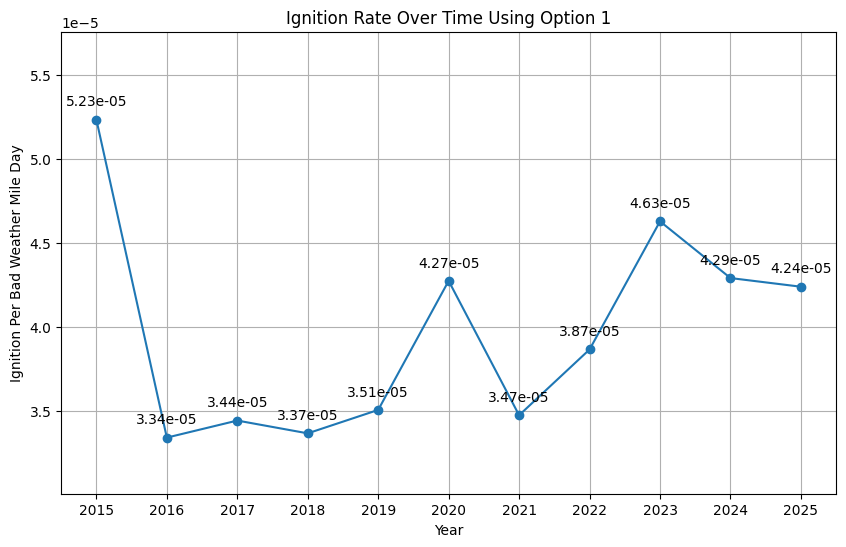

In [570]:
# Create a line plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(res_df['Year'], res_df['Ignition Ratio'], marker='o')
ax.set_title('Ignition Rate Over Time Using Option 1')
ax.set_xlabel('Year')
ax.set_ylabel('Ignition Per Bad Weather Mile Day')
# annotate the points
for i, txt in enumerate(res_df['Ignition Ratio']):
    ax.annotate(f"{txt:.2e}", (res_df['Year'][i], res_df['Ignition Ratio'][i]), textcoords="offset points", xytext=(0,10), ha='center')
# make y max
ax.set_ylim(res_df['Ignition Ratio'].min() * 0.9, res_df['Ignition Ratio'].max() * 1.1)
plt.xticks(res_df['Year'])
plt.grid()
plt.show()

In [571]:
# create a result table
table = []
custom_weight = True # Change to True to use customized weights
custom_std = True # Change to True to use customized std
for yr in range(2020, 2027):
    start, end = yr-5, yr-1
    # filter the data for the last 5 years
    filtered_data = res_df[(res_df['Year'] >= start) & (res_df['Year'] <= end)]
    # assign weights to first, second and third year
    # weights = [0.1, 0.2, 0.7]
    weights = [1/5, 1/5, 1/5, 1/5, 1/5]
    if custom_weight:
        weights = [0.05, 0.05, 0.1, 0.1, 0.7]
    filtered_data['weights'] = weights
    # calculate the weighted average of Ignition Ratio
    weighted_avg = (filtered_data['Ignition Ratio'] * filtered_data['weights']).sum() / filtered_data['weights'].sum()
    target = weighted_avg
    # get the standard deviation of Ignition Ratio and multiply by 1.5 to get bound
    bound = filtered_data['Ignition Ratio'].std() * 1.5
    if custom_std:
        filtered_temp = res_df[res_df['Year'] <= end]
        bound = filtered_temp['Ignition Ratio'].std() * 1.5
    # get p80 by adding the bound to the ratio
    p80 = target + bound
    # get p20 by subtracting the bound from the ratio
    p20 = target - bound
    # get the actual ratio for the current year
    actual = res_df[res_df['Year'] == yr]['Ignition Ratio'].values
    if actual.size == 0:
        actual = [0]
    # append the result to the table
    table.append({
        'Year': yr,
        'Actual': actual[0],
        'P20': p20, 
        'Target': target,
        'P80': p80,
        'Bound': bound
    })
# convert the table to a DataFrame
result_table = pd.DataFrame(table)
result_table

C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1980950435.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weights'] = weights
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1980950435.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weights'] = weights
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1980950435.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Year,Actual,P20,Target,P80,Bound
0,2020,0.000043,0.000023,0.000036,0.000048,0.000012
1,2021,0.000035,0.000029,0.000040,0.000052,0.000011
2,2022,0.000039,0.000025,0.000036,0.000046,0.000011
3,2023,0.000046,0.000028,0.000038,0.000048,0.000010
4,2024,0.000043,0.000034,0.000044,0.000054,0.000010
5,2025,0.000042,0.000033,0.000042,0.000052,0.000010
6,2026,0.000000,0.000033,0.000042,0.000052,0.000009


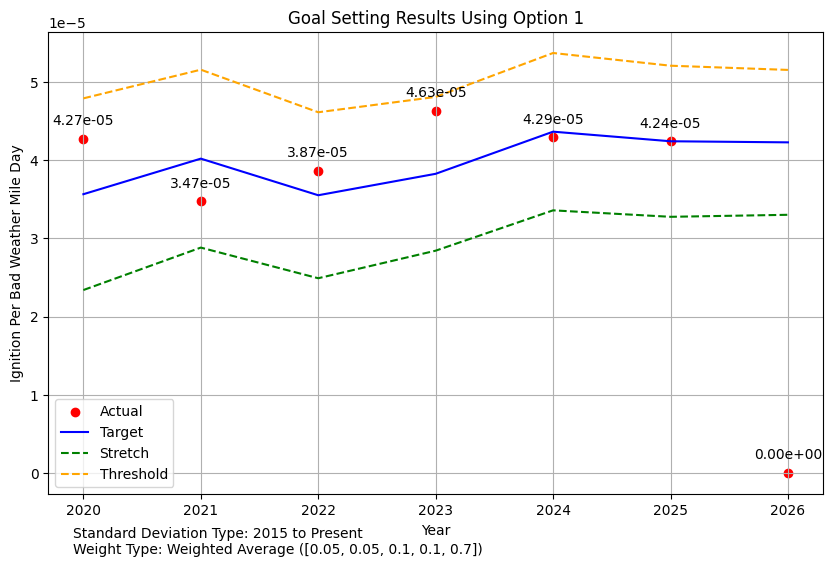

In [572]:
# plot the result table
fig, ax = plt.subplots(figsize=(10, 6))
# draw x points only for Actual
ax.scatter(result_table['Year'], result_table['Actual'], color='red', label='Actual')
# draw solid line for Target
ax.plot(result_table['Year'], result_table['Target'], color='blue', label='Target')
# draw dotted line for P20 and P80
ax.plot(result_table['Year'], result_table['P20'], color='green', linestyle='--', label='Stretch')
ax.plot(result_table['Year'], result_table['P80'], color='orange', linestyle='--', label='Threshold')
# annotate the actual
for i, txt in enumerate(result_table['Actual']):
    ax.annotate(f"{txt:.2e}", (result_table['Year'][i], result_table['Actual'][i]), textcoords="offset points", xytext=(0,10), ha='center')
weight_type = "Unweighted Average"
std_type = "5 Years"
if custom_weight:
    weight_type = f"Weighted Average ({weights})"
if custom_std:
    std_type = "2015 to Present"
ax.set_title(f'Goal Setting Results Using Option 1')
ax.set_xlabel('Year')
ax.set_ylabel('Ignition Per Bad Weather Mile Day')
# add legend
ax.legend()
# add text to the bottom
plt.figtext(0.15, 0.01, f"Standard Deviation Type: {std_type}\nWeight Type: {weight_type}", fontsize=10)
plt.xticks(result_table['Year'])
plt.grid()
plt.show()

### Creating Ignition Distribution Matrix

In [465]:
# get the ignition data
# read list of ignitions with FCZ mapped
ignitions = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions = ignitions.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions['Year'] = pd.to_datetime(ignitions['Date']).dt.year
# keep only SCE involved ignitions
ignitions = ignitions[ignitions['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# ignore rows that have open status
ignitions = ignitions[~ignitions['Status'].str.contains('open', case=False, na=False)]
# keep only reportable ignitions
ignitions = ignitions[ignitions['CPUC Reportable']==1]
# keep only HFRA ignitions
ignitions = ignitions[ignitions['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions.loc[ignitions['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'
# change date format
ignitions['Date'] = pd.to_datetime(ignitions['Date']).dt.strftime('%Y-%m-%d')
# from 2017 onward
ignitions = ignitions[ignitions['Year'] >= 2017]
# before 2025
ignitions = ignitions[ignitions['Year'] < 2025]

# group by Date and Circuit_ID
ignitions_count_agg = ignitions.groupby(['Date','Circuit_ID']).agg({'Event_ID': 'count',}).reset_index().rename(columns={'Event_ID': 'Ignition_Count', 'Circuit_ID':'Circuit FLOC'})
ignitions_count_agg

,Date,Circuit FLOC,Ignition_Count
0,2017-01-13,ED-15922,1
1,2017-03-15,ED-12960,1
2,2017-03-17,ED-08795,1
3,2017-04-16,ED-13791,1
4,2017-04-23,ED-08795,1
...,...,...,...
307,2024-11-09,ED-14005,1
308,2024-11-15,ED-03890,1
309,2024-12-01,ED-02674,1
310,2024-12-04,ET-00069,1


In [466]:
# create a copy of ignitions_agg data 
ignitions_agg = ignitions_count_agg.copy()
# map Circuit FLOC to Circuit Name
ignitions_agg = pd.merge(ignitions_agg, circuitlengths_map, on='Circuit FLOC', how='left', validate='m:1')
# reread circuit lengths file
circuitlengths2 = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Q1_2025-_HFRA_Conductor_SumStat_Circuit.xlsx")
# filter only for ones where ignitions_agg Circuit Name is Null
circuitlengths2 = circuitlengths2[circuitlengths2['Circuit FLOC'].isin(ignitions_agg[ignitions_agg['Circuit Name'].isna()]['Circuit FLOC'].unique())]
circuitlengths2_hfra = circuitlengths2[circuitlengths2['HFRA Tier'].notna()]
# group by Circuit FLOC and Circuit Name, summing Circuit Miles
circuitlengths2_hfra = circuitlengths2_hfra.groupby(['Circuit FLOC', 'Circuit Name'])['Circuit Miles'].sum().reset_index()
circuitlengths2_nonhfra = circuitlengths2[circuitlengths2['HFRA Tier'].isna()]
# group by Circuit FLOC and Circuit Name, summing Circuit Miles
circuitlengths2_nonhfra = circuitlengths2_nonhfra.groupby(['Circuit FLOC', 'Circuit Name'])['Circuit Miles'].sum().reset_index()
# merge circuitlengths2_hfra with ignitions_agg
ignitions_agg = pd.merge(ignitions_agg, circuitlengths2_hfra, on='Circuit FLOC', how='left', validate='m:1', suffixes=('', '_y'))
# merge circuitlengths2_nonhfra with ignitions_agg
ignitions_agg = pd.merge(ignitions_agg, circuitlengths2_nonhfra, on='Circuit FLOC', how='left', validate='m:1', suffixes=('', '_nonhfra'))
# fill NaN values in Circuit Name with Circuit Name_y or Circuit Name_nonhfra
ignitions_agg['Circuit Name'] = ignitions_agg['Circuit Name'].fillna(ignitions_agg['Circuit Name_y']).fillna(ignitions_agg['Circuit Name_nonhfra'])
# fill NaN values in Circuit Miles with Circuit Miles_y or Circuit Miles_nonhfra
ignitions_agg['Circuit Miles'] = ignitions_agg['Circuit Miles'].fillna(ignitions_agg['Circuit Miles_y']).fillna(ignitions_agg['Circuit Miles_nonhfra'])
# drop unnecessary columns
ignitions_agg = ignitions_agg.drop(columns=['Circuit Name_y', 'Circuit Miles_y', 'Circuit Name_nonhfra', 'Circuit Miles_nonhfra'])
# get circuit data
all_circuit_data = distribution_data[['Date','id', fuel_var]].copy()
# create a rolling mean column
all_circuit_data[f'{fuel_var}_rolling'] = all_circuit_data[fuel_var].rolling(window=14, min_periods=1).mean()
# rename columns
all_circuit_data = all_circuit_data.rename(columns={
    'id': 'Circuit Name',
    'time': 'Date',
})
# # make sure Circuit Name is uppercase
all_circuit_data['Circuit Name'] = all_circuit_data['Circuit Name'].str.upper()
# split the Circuit Name from _
# make sure Date is in the correct format
all_circuit_data['Date'] = pd.to_datetime(all_circuit_data['Date']).dt.strftime('%Y-%m-%d')
# keep only ones before 2025
all_circuit_data = all_circuit_data[all_circuit_data['Date'] < '2025-01-01']
# split Circuit Name by _ and keep the first part
all_circuit_data['Circuit Name'] = all_circuit_data['Circuit Name'].str.split('_').str[0]
# drop duplicates
all_circuit_data = all_circuit_data.drop_duplicates(subset=['Circuit Name', 'Date'])
# # read forecast circuit data
# forecast_circuit_2025 = pd.read_csv("CircuitLevelData/Forecast_Circuit_20250715.csv")
# # concatenate forecast circuit data with all_circuit_data
# all_circuit_data = pd.concat([all_circuit_data, forecast_circuit_2025], ignore_index=True)
# convert Date to string
all_circuit_data['Date'] = pd.to_datetime(all_circuit_data['Date']).dt.strftime('%Y-%m-%d')
# merge all_circuit_data with ignitions_agg
ignitions_agg = pd.merge(ignitions_agg, all_circuit_data[['Circuit Name', 'Date', fuel_var,f'{fuel_var}_rolling']], on=['Circuit Name', 'Date'], how='left', validate='1:1')
# change where circuit floc says ET-4090 and change to ET-01503
ignitions_agg.loc[ignitions_agg['Circuit FLOC'] == 'ET-4090', 'Circuit FLOC'] = 'ET-01503'
ignitions_agg.loc[ignitions_agg['Circuit FLOC'] == 'ET-01503','Circuit Name'] = 'KAWEAH 1 2 3-KAWGEN-LEMON COVE-THREE RIV'
# ignore the transmission circuits
ignitions_agg = ignitions_agg[~ignitions_agg['Circuit FLOC'].str.contains('ET', case=False, na=False)]
ignitions_agg

,Date,Circuit FLOC,Ignition_Count,Circuit Name,Circuit Miles,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling
0,2017-01-13,ED-15922,1,SAUNDERS,67.880898,0.098560,0.153875
1,2017-03-15,ED-12960,1,OAK GLEN,29.485186,0.057347,0.070275
2,2017-03-17,ED-08795,1,HUCKLEBERRY,27.306673,0.072122,0.089106
3,2017-04-16,ED-13791,1,PATRICIA,65.958273,0.119491,0.086009
4,2017-04-23,ED-08795,1,HUCKLEBERRY,27.306673,0.104686,0.060886
...,...,...,...,...,...,...,...
305,2024-11-06,ED-08707,1,HOSS,10.731380,0.779988,0.828476
307,2024-11-09,ED-14005,1,PHEASANT,12.020157,0.846953,0.830883
308,2024-11-15,ED-03890,1,CONCEPCION,32.905882,0.491622,0.660032
309,2024-12-01,ED-02674,1,CALGROVE,26.129070,0.728085,0.708458


In [467]:
# create another res_df 
res_df2 = all_circuit_data.copy()
# merge res_df2 with circuitsmap
res_df2 = pd.merge(res_df2, circuitlengths_map, on='Circuit Name', how='left', validate='m:1')
res_df2

,Date,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Circuit FLOC,Circuit Miles
0,2015-01-01,HI LINE,0.265334,0.265334,ED-08427,25.181100
1,2015-01-02,HI LINE,0.274315,0.269825,ED-08427,25.181100
2,2015-01-03,HI LINE,0.267696,0.269115,ED-08427,25.181100
3,2015-01-04,HI LINE,0.265099,0.268111,ED-08427,25.181100
4,2015-01-05,HI LINE,0.306010,0.275691,ED-08427,25.181100
...,...,...,...,...,...,...
14378203,2024-12-27,STROSNIDER,0.306157,0.339235,ED-17122,15.212386
14378204,2024-12-28,STROSNIDER,0.286921,0.333205,ED-17122,15.212386
14378205,2024-12-29,STROSNIDER,0.277896,0.327431,ED-17122,15.212386
14378206,2024-12-30,STROSNIDER,0.304461,0.325962,ED-17122,15.212386


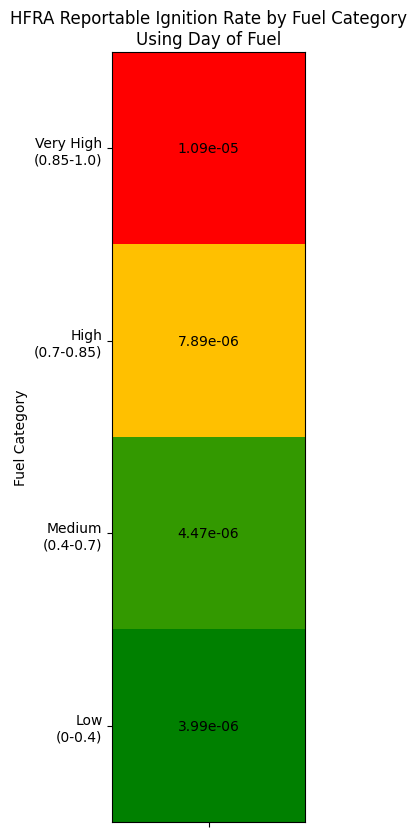

In [468]:
# create an aggregated copy of ignitions_agg and res_df2
ignitions_agg_agg = ignitions_agg.copy()
res_df2_agg = res_df2.copy()
# categorize fuel types
agg_fuel1, agg_fuel2, agg_fuel3 = 0.85, 0.7, 0.4
ignition_cond = [ignitions_agg_agg[f"{fuel_var}"] >= agg_fuel1, 
                 (ignitions_agg_agg[f"{fuel_var}"] < agg_fuel1) & (ignitions_agg_agg[f"{fuel_var}"] >= agg_fuel2),
                 (ignitions_agg_agg[f"{fuel_var}"] < agg_fuel2) & (ignitions_agg_agg[f"{fuel_var}"] >= agg_fuel3),
                 ignitions_agg_agg[f"{fuel_var}"] < agg_fuel3]
ignition_choices = [f"{agg_fuel1}-1.0", f"{agg_fuel2}-{agg_fuel1}", f"{agg_fuel3}-{agg_fuel2}", f"0-{agg_fuel3}"]
res_df2_cond = [res_df2_agg[f"{fuel_var}"] >= agg_fuel1, 
                 (res_df2_agg[f"{fuel_var}"] < agg_fuel1) & (res_df2_agg[f"{fuel_var}"] >= agg_fuel2),
                 (res_df2_agg[f"{fuel_var}"] < agg_fuel2) & (res_df2_agg[f"{fuel_var}"] >= agg_fuel3),
                 res_df2_agg[f"{fuel_var}"] < agg_fuel3]
res_df2_choices = [f"{agg_fuel1}-1.0", f"{agg_fuel2}-{agg_fuel1}", f"{agg_fuel3}-{agg_fuel2}", f"0-{agg_fuel3}"]
ignitions_agg_agg['Fuel Category'] = np.select(ignition_cond, ignition_choices, default=ignition_choices[-1])
res_df2_agg['Fuel Category'] = np.select(res_df2_cond, res_df2_choices, default=res_df2_choices[-1])
# group ignitions_agg_agg by Fuel Category, take sum of Ignition Count
ignitions_agg_grouped = ignitions_agg_agg.groupby('Fuel Category')['Ignition_Count'].sum().reset_index()
# group res_df2_agg by Fuel Category, take sum of Circuit Miles
res_df2_grouped = res_df2_agg.groupby('Fuel Category')['Circuit Miles'].sum().reset_index()
# merge ignitions_agg_grouped and res_df2_grouped on Fuel Category
merged_grouped = pd.merge(ignitions_agg_grouped, res_df2_grouped, on='Fuel Category', how='outer')
# Calculate Ignition Rate
merged_grouped['Ignition Rate'] = merged_grouped['Ignition_Count'] / merged_grouped['Circuit Miles']
# Create an array for Ignition Rate
ignition_rate_array = np.array(merged_grouped['Ignition Rate']).reshape(4,1)
# reverse the array
ignition_rate_array = np.flip(ignition_rate_array, axis=0)
ignition_rate_array
# draw a matrix for the rates
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['green', 'yellow', 'orange', 'red']
cmap2 = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)
colors = cmap2(ignition_rate_array.reshape(-1, 1))
sm = ScalarMappable(cmap=cmap2, norm=plt.Normalize(0, ignition_rate_array.max()))
sm.set_array([])
im = ax.imshow(ignition_rate_array, cmap=cmap2)

# add ticks
# ax.set_xticks(np.arange(len(wind_cats)), )
# create a category label list
word_choices = ["Very High", "High", "Medium", "Low"]
fuel_categories = [f"{word}" + f"\n({res_choice})" for word, res_choice in zip(word_choices, res_df2_choices)]
ax.set_xticks(np.arange(1), labels=[''])
ax.set_yticks(np.arange(len(res_df2_choices)), labels=fuel_categories)
for i in range(ignition_rate_array.shape[0]):
    for j in range(ignition_rate_array.shape[1]):
        text = ax.text(j, i, f"{ignition_rate_array[i, j]:.2e}", ha='center', va='center', color='black')  
# # set x label
# ax.set_xlabel('Wind Category')
# set y label
ax.set_ylabel('Fuel Category')
# set title
ax.set_title('HFRA Reportable Ignition Rate by Fuel Category\nUsing Day of Fuel')
plt.show()

Strings for Transmission for ESIR Events:

correction-cummings | gould-sylmar | moorpark-royal | bailey-neenach | eagle rock-sylmar | mesa-vincent no. 2

subtrans | bulktrans | subtrans | subtrans | bulktrans | bulktrans 

BANDUCCI-CORRECTION-CUMMINGS_49 | GOULD-SYLMAR_168 | MOORPARK-ROYAL NO. 2_103 | BAILEY-NEENACH-WESTPAC_59 | EAGLE ROCK-SYLMAR_168 | MESA-VINCENT NO. 2_153

In [405]:
bulktrans

,time,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Date
0,2017-01-01T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.194957,0.194957,2017-01-01
1,2017-01-02T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.140786,0.167872,2017-01-02
2,2017-01-03T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.136154,0.157299,2017-01-03
3,2017-01-04T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.154159,0.156514,2017-01-04
4,2017-01-05T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.111151,0.147441,2017-01-05
...,...,...,...,...,...
1256885,2024-12-28T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.492601,0.501895,2024-12-28
1256886,2024-12-29T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.506357,0.499564,2024-12-29
1256887,2024-12-30T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.510836,0.499230,2024-12-30
1256888,2024-12-31T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.541705,0.503910,2024-12-31


In [504]:
# read forecast data for Eaton and Hurst
dates_Eaton = pd.date_range(start='2025-01-01', end='2025-01-07', freq='D')
# loop through each date in dates_Eaton
fuel_eaton = []
# check the old ones from 12-25-2024
old_eaton = bulktrans[(bulktrans['Date'] >= '2024-12-25') & (bulktrans['Date'] <= '2024-12-31')]
old_eaton = old_eaton[old_eaton['Circuit Name'].str.contains('MESA-VINCENT NO. 2_153', case=False)]
# print(old_eaton)
# append the fuel_var column
fuel_eaton += old_eaton[fuel_var].values.tolist()
for date in dates_Eaton:
    # print(date)
    # filter trans_forecast for the current date
    date_str = date.strftime('%Y%m%d')
    file_path = f"//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Bulk_Forecasts 1-1-25 through 7-15-25/circuit_level_weather_fpi2_BulkTrans_HFA_{date_str}.csv"
    # read trans_forecast
    trans_forecast = pd.read_csv(file_path, low_memory=False)
    # filter for the current date
    # reformat date
    date_str = date.strftime('%Y-%m-%d')
    trans_forecast['Date'] = pd.to_datetime(trans_forecast['Datetime']).dt.strftime('%Y-%m-%d')
    daily_forecast = trans_forecast[trans_forecast['Date'] == date_str]
    circuit_to_search = 'mesa-vincent no. 2_153'
    daily_forecast = daily_forecast[daily_forecast['Circuit'].str.contains(circuit_to_search, case=False)]
    # group by Date, take the mean of 'FuelsIndex_max_FPI2'
    # print(daily_forecast)
    daily_forecast = daily_forecast.groupby('Date')['FuelsIndex_max_FPI2'].mean().reset_index()
    # print(daily_forecast)
    # append 'FuelsIndex_max_FPI2' to fuel_eaton
    fuel_eaton.append(daily_forecast['FuelsIndex_max_FPI2'].values[0])

fuel_hurst = []
# check the old ones from 12-26-2024
old_hurst = bulktrans[(bulktrans['Date'] >= '2024-12-26') & (bulktrans['Date'] <= '2024-12-31')]
old_hurst = old_hurst[old_hurst['Circuit Name'].str.contains('EAGLE ROCK-SYLMAR_168', case=False)]
# append the fuel_var column
fuel_hurst += old_hurst[fuel_var].values.tolist()
dates_Hurst = pd.date_range(start='2025-01-01', end='2025-01-08', freq='D')
for date in dates_Hurst:
    # filter trans_forecast for the current date
    date_str = date.strftime('%Y%m%d')
    file_path = f"//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Bulk_Forecasts 1-1-25 through 7-15-25/circuit_level_weather_fpi2_BulkTrans_HFA_{date_str}.csv"
    # read trans_forecast
    trans_forecast = pd.read_csv(file_path, low_memory=False)
    # filter for the current date
    trans_forecast['Date'] = pd.to_datetime(trans_forecast['Datetime'])
    # filter for the current date
    # reformat date
    date_str = date.strftime('%Y-%m-%d')
    daily_forecast = trans_forecast[trans_forecast['Date'] == date_str]
    circuit_to_search = 'eagle rock-sylmar_168'
    daily_forecast = daily_forecast[daily_forecast['Circuit'].str.contains(circuit_to_search, case=False)]
    # group by Date, take the mean of 'FuelsIndex_max_FPI2'
    daily_forecast = daily_forecast.groupby('Date')['FuelsIndex_max_FPI2'].mean().reset_index()
    # append 'FuelsIndex_max_FPI2' to fuel_hurst
    fuel_hurst.append(daily_forecast['FuelsIndex_max_FPI2'].values[0])

In [518]:
trans_forecast = pd.read_csv(r"\\sce.eix.com\workgroup\SPE_DSA\Charles\IgnitionGoalSettingInput\Bulk_Forecasts 1-1-25 through 7-15-25\circuit_level_weather_fpi2_BulkTrans_HFA_20250108.csv")
temp_circuit_str = 'eagle rock-sylmar_168'
trans_forecast = trans_forecast[trans_forecast['Circuit'].str.contains(temp_circuit_str,case=False)]
trans_forecast['Date'] = pd.to_datetime(trans_forecast['Datetime']).dt.strftime('%Y-%m-%d')
trans_forecast

,Datetime,Circuit,Circuit_No,Master Circuit,Segment_Nu,District,County,Substation,Voltage,Wind_Threshold,...,DFM1hr_max_FPI2,DFM10hr_max_FPI2,DFM100hr_max_FPI2,DFM1000hr_max_FPI2,LFM_max_FPI2,NDVI_max_FPI2,FuelsIndex_max_FPI2,LFPwtdd_max_FPI2,FPI2_Thresholds,Date
7239,2025-01-08 00:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.06,0.08,0.12,0.15,0.67,0.29,0.67,35.23,NaN,2025-01-08
7240,2025-01-08 03:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.07,0.08,0.12,0.15,0.67,0.29,0.67,32.02,NaN,2025-01-08
7241,2025-01-08 06:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.07,0.08,0.12,0.15,0.67,0.29,0.67,33.35,NaN,2025-01-08
7242,2025-01-08 09:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.07,0.08,0.11,0.15,0.67,0.29,0.67,16.15,NaN,2025-01-08
7243,2025-01-08 12:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.05,0.06,0.11,0.14,0.67,0.29,0.71,29.23,NaN,2025-01-08
7244,2025-01-08 15:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.04,0.06,0.11,0.14,0.67,0.29,0.70,31.97,NaN,2025-01-08
7245,2025-01-08 18:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.04,0.06,0.11,0.15,0.67,0.29,0.69,25.78,NaN,2025-01-08
7246,2025-01-08 21:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.04,0.06,0.11,0.14,0.66,0.32,0.66,22.95,NaN,2025-01-08
7247,2025-01-09 00:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.05,0.06,0.11,0.15,0.66,0.29,0.68,1.14,NaN,2025-01-09
7248,2025-01-09 03:00:00,EAGLE ROCK-SYLMAR_168,ET-00755,EAGLE ROCK-SYLMAR,168,0,Los Angeles,EAGLE ROCK,220.0,40.0,...,0.05,0.06,0.11,0.15,0.66,0.29,0.67,1.35,NaN,2025-01-09


In [496]:
trans_forecast[trans_forecast['Date'] == '2025-01-07']['FuelsIndex_max_FPI2'].mean()

np.float64(0.7054166666666667)

In [ ]:
trans_forecast[trans_forecast['Date']=='01-07-2025']

Text(0.5, 1.0, 'ESIR Events by Fuel Option 1')

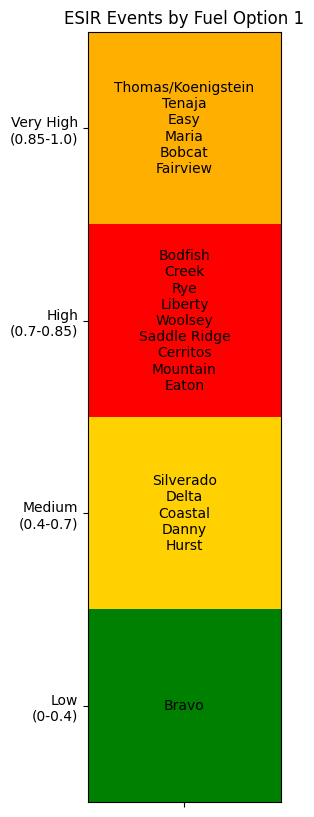

In [519]:
# Check ESIR ignitions
# read esir events from Peter
esir_events = pd.read_excel('//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/ESIR_200_ACRES_fromPeter.xlsx')
# rename column
esir_events = esir_events.rename(columns={'Circuit': 'Circuit Name'})
# keep only ones that are 2017 and later
esir_events = esir_events[esir_events['Date'].dt.year >= 2017]
esir_events['Date'] = esir_events['Date'].dt.strftime('%Y-%m-%d')
# locate where name of fire says Bravo and change Circuit Name to BANDUCCI-CORRECTION-CUMMINGS_49
esir_events.loc[esir_events['Name of Fire'].str.contains('Bravo', case=False, na=False), 'Circuit Name'] = 'BANDUCCI-CORRECTION-CUMMINGS_49'
# locate where name of fire says Saddle Ridge and change Circuit Name to GOULD-SYLMAR_168
esir_events.loc[esir_events['Name of Fire'].str.contains('Saddle Ridge', case=False, na=False), 'Circuit Name'] = 'GOULD-SYLMAR_168'
# locate where name of fire says Easy and change Circuit Name to MOORPARK-ROYAL NO. 2_103
esir_events.loc[esir_events['Name of Fire'].str.contains('Easy', case=False, na=False), 'Circuit Name'] = 'MOORPARK-ROYAL NO. 2_103'
# locate where name of fire says Delta and change Circuit Name to BAILEY-NEENACH-WESTPAC_59
esir_events.loc[esir_events['Name of Fire'].str.contains('Delta', case=False, na=False), 'Circuit Name'] = 'BAILEY-NEENACH-WESTPAC_59'
# locate where name of fire says Hurst and change Circuit Name to EAGLE ROCK-SYLMAR_168
esir_events.loc[esir_events['Name of Fire'].str.contains('Hurst', case=False, na=False), 'Circuit Name'] = 'EAGLE ROCK-SYLMAR_168'
# locate where name of fire says Eaton and change Circuit Name to MESA-VINCENT NO. 2_165
esir_events.loc[esir_events['Name of Fire'].str.contains('Eaton', case=False, na=False), 'Circuit Name'] = 'MESA-VINCENT NO. 2_165'
# merge with different data
esir_events = pd.merge(esir_events, res_df2_agg, how='left', on=['Date','Circuit Name'])
# merge with bulktrans
esir_events = pd.merge(esir_events, bulktrans[['Date', 'Circuit Name',fuel_var, f"{fuel_var}_rolling"]], how='left', on=['Date','Circuit Name'], suffixes=['','_bulktrans'])
# merge with subtrans
esir_events = pd.merge(esir_events, subtrans[['Date', 'Circuit Name',fuel_var, f"{fuel_var}_rolling"]], how='left', on=['Date','Circuit Name'], suffixes=['','_subtrans'])
# fill na fuel_var with fuel_var_bulktrans and fuel_var_subtrans
esir_events[fuel_var] = esir_events[fuel_var].fillna(esir_events[f"{fuel_var}_bulktrans"]).fillna(esir_events[f"{fuel_var}_subtrans"])
# fill na fuel_var_rolling with fuel_var_rolling_bulktrans and fuel_var_rolling_subtrans
esir_events[f"{fuel_var}_rolling"] = esir_events[f"{fuel_var}_rolling"].fillna(esir_events[f"{fuel_var}_rolling_bulktrans"]).fillna(esir_events[f"{fuel_var}_rolling_subtrans"])
# for Hurst, use last value from fuel_hurst for fuel_var
esir_events.loc[esir_events['Name of Fire'].str.contains('Hurst', case=False, na=False), fuel_var] = fuel_hurst[-1]
# for Eaton, use last value from fuel_eaton for fuel_var
esir_events.loc[esir_events['Name of Fire'].str.contains('Eaton', case=False, na=False), fuel_var] = fuel_eaton[-1]
# for Hurst, use average of fuel_hurst for fuel_var_rolling
esir_events.loc[esir_events['Name of Fire'].str.contains('Hurst', case=False, na=False), f"{fuel_var}_rolling"] = np.mean(fuel_hurst)
# for Eaton, use average of fuel_eaton for fuel_var_rolling
esir_events.loc[esir_events['Name of Fire'].str.contains('Eaton', case=False, na=False), f"{fuel_var}_rolling"] = np.mean(fuel_eaton)
# Create Fuel Category 1 and 2
fuel_val1_1, fuel_val2_1, fuel_val3_1 = 0.85, 0.7, 0.4
cond_1 = [esir_events[fuel_var]>= fuel_val1_1,
          (esir_events[fuel_var] < fuel_val1_1) & (esir_events[fuel_var] >= fuel_val2_1),
          (esir_events[fuel_var] < fuel_val2_1) & (esir_events[fuel_var] >= fuel_val3_1),
          esir_events[fuel_var] < fuel_val3_1]
choices_1 = [f"{fuel_val1_1}-1.0", f"{fuel_val2_1}-{fuel_val1_1}", f"{fuel_val3_1}-{fuel_val2_1}", f"0-{fuel_val3_1}"]
fuel_val1_2, fuel_val2_2, fuel_val3_2 = 0.8, 0.6, 0.4
cond_2 = [esir_events[f"{fuel_var}_rolling"]>= fuel_val1_2,
          (esir_events[f"{fuel_var}_rolling"] < fuel_val1_2) & (esir_events[f"{fuel_var}_rolling"] >= fuel_val2_2),
          (esir_events[f"{fuel_var}_rolling"] < fuel_val2_2) & (esir_events[f"{fuel_var}_rolling"] >= fuel_val3_2),
          esir_events[f"{fuel_var}_rolling"] < fuel_val3_2]
choices_2 = [f"{fuel_val1_2}-1.0", f"{fuel_val2_2}-{fuel_val1_2}", f"{fuel_val3_2}-{fuel_val2_2}", f"0-{fuel_val3_2}"]
esir_events['Fuel Category 1'] = np.select(cond_1, choices_1, default=choices_1[-1])
esir_events['Fuel Category 2'] = np.select(cond_2, choices_2, default=choices_2[-1])

# declare category to use
category_to_use = 'Fuel Category 1'
# create a names_matrix
names_matrix = []
count_matrix = []
choices_order = choices_1 if category_to_use == 'Fuel Category 1' else choices_2
for choice in choices_order:
    # look for the choice in esir_events_res['Fuel_Wind_Category']
    names = esir_events[esir_events[category_to_use] == choice]['Name of Fire'].unique().tolist()
    # join names with newline
    names = '\n'.join(names) if names else ''
    count = esir_events[esir_events[category_to_use] == choice]['Name of Fire'].count().tolist()
    names_matrix.append(names)
    count_matrix.append(count)
# reshape count_matrix to a 2D array with 4 rows and 2 columns
count_matrix = np.array(count_matrix).reshape(4, 1)
# reshape names_matrix to a 2D array with 4 rows and 2 columns, filling with empty strings if necessary
names_matrix = np.array(names_matrix).reshape(4, 1)
# draw a matrix for the names
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['green', 'yellow', 'orange', 'red']
cmap1 = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)
colors = cmap1(count_matrix.reshape(-1, 1))
sm = ScalarMappable(cmap=cmap1, norm=plt.Normalize(0, count_matrix.max()))
sm.set_array([])
im = ax.imshow(count_matrix, cmap=cmap1)

# add ticks
# wind_cats = [f'Low Wind \n(Below {wind_val})', f'High Wind \n(At least {wind_val})']
fuel_cats = [f"{word}" + f"\n({res_choice})" for word, res_choice in zip(word_choices, choices_order)]
ax.set_xticks(np.arange(1), labels=[''])
ax.set_yticks(np.arange(len(fuel_cats)), labels=fuel_cats)
# loop through each category
for i in range(count_matrix.shape[0]):
    for j in range(count_matrix.shape[1]):
        text = ax.text(j, i, names_matrix[i, j], ha='center', va='center', color='black')
# set title
title_option = "Option 1" if category_to_use == 'Fuel Category 1' else "Option 2"
ax.set_title(f'ESIR Events by Fuel {title_option}')

In [469]:
esir_events

,Name of Fire,Structure,Circuit Name,Rough Cause,FIPA ID,Date,Year,Quater,Acres Damaged,Structures Damaged,...,mean_max_fpi_2.0_tdd_fuels_index_rolling,Circuit FLOC,Circuit Miles,Fuel Category,mean_max_fpi_2.0_tdd_fuels_index_bulktrans,mean_max_fpi_2.0_tdd_fuels_index_rolling_bulktrans,mean_max_fpi_2.0_tdd_fuels_index_subtrans,mean_max_fpi_2.0_tdd_fuels_index_rolling_subtrans,Fuel Category 1,Fuel Category 2
0,Bravo,NaN,BANDUCCI-CORRECTION-CUMMINGS_49,CFO - Animal,Pre-FIPA DB,2017-05-12,2017,Q2,288,0.0,...,0.107086,NaN,NaN,NaN,NaN,NaN,0.081380,0.107086,0-0.4,0-0.4
1,Bodfish,OH-4606836E/OH-4254344E,ERSKINE,Unknown,Pre-FIPA DB,2017-06-10,2017,Q2,206,0.0,...,0.772753,ED-06040,76.068169,0.7-0.85,NaN,NaN,NaN,NaN,0.6-0.8,0.6-0.8
2,Thomas/Koenigstein,OH-729565E/OH729566E,CASTRO,EFF/W2W,Pre-FIPA DB,2017-12-04,2017,Q4,281893,280.0,...,0.885960,ED-04632,46.172120,0.85-1.0,NaN,NaN,NaN,NaN,0.8-1.0,0.8-1.0
3,Creek,NaN,LOPEZ,Unknown,FIPA_2017_1205_0345,2017-12-05,2017,Q4,15619,144.0,...,0.733423,ED-10705,29.730529,0.7-0.85,NaN,NaN,NaN,NaN,0.6-0.8,0.6-0.8
4,Rye,OH-4389254E,NIGHTHAWK,EFF,Pre-FIPA DB,2017-12-05,2017,Q4,6049,3.0,...,0.740874,ED-12711,3.670647,0.7-0.85,NaN,NaN,NaN,NaN,0.6-0.8,0.6-0.8
5,Liberty,OH-2090695E,CLYDESDALE,EFF,Pre-FIPA DB,2017-12-07,2017,Q4,300,0.0,...,0.708029,ED-03711,8.773618,0.7-0.85,NaN,NaN,NaN,NaN,0.6-0.8,0.6-0.8
6,Woolsey,NaN,BIG ROCK,EFF,Pre-FIPA DB,2018-11-08,2018,Q4,96949,364.0,...,0.891922,ED-01630,27.587772,0.7-0.85,NaN,NaN,NaN,NaN,0.6-0.8,0.8-1.0
7,Tenaja,OH-4532048E,WILDOMAR,Unknown,FIPA_2019_0904_0355,2019-09-04,2019,Q3,1926,2.0,...,0.933461,ED-19383,11.217849,0.85-1.0,NaN,NaN,NaN,NaN,0.8-1.0,0.8-1.0
8,Saddle Ridge,OH-7011715/OH-7011735,GOULD-SYLMAR_168,EFF,FIPA_2019_1010_2100,2019-10-10,2019,Q4,8799,88.0,...,0.799557,NaN,NaN,NaN,0.809822,0.799557,NaN,NaN,0.8-1.0,0.6-0.8
9,Easy,OH-4244905E/OH-4244906E,MOORPARK-ROYAL NO. 2_103,EFF,FIPA_2019_1030_0607,2019-10-30,2019,Q4,1806,0.0,...,0.897127,NaN,NaN,NaN,NaN,NaN,0.897750,0.897127,0.8-1.0,0.8-1.0


In [382]:
esir_events[esir_events[fuel_var].isna()][['Name of Fire','Circuit Name']]

,Name of Fire,Circuit Name
0,Bravo,CORRECTION-CUMMINGS-KERN RIVER 1
8,Saddle Ridge,GOULD-SYLMAR
9,Easy,MOORPARK-ROYAL NO. 1
14,Delta,BAILEY-NEENACH-WESTPAC
19,Hurst,EAGLE ROCK-SYLMAR
20,Eaton,MESA-VINCENT NO.2


## Option 2: Use 0.8 as Cutoff, but Use Rolling 14 day Fuel Mean

In [530]:
# read ignition data
ignitions = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions = ignitions.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions['Year'] = pd.to_datetime(ignitions['Date']).dt.year
# keep only SCE involved ignitions
ignitions = ignitions[ignitions['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# keep only reportable ignitions
ignitions = ignitions[ignitions['CPUC Reportable']==1]
# for Status, ignore the ones that say open
ignitions = ignitions[~ignitions['Status'].str.contains('open', case=False, na=False)]
# keep only HFRA ignitions
ignitions = ignitions[ignitions['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions.loc[ignitions['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'
# change date format
ignitions['Date'] = pd.to_datetime(ignitions['Date']).dt.strftime('%Y-%m-%d')
# from 2015 onward
ignitions = ignitions[ignitions['Year'] >= 2015]
# # before August 1 2025
# ignitions = ignitions[ignitions['Date'] < '2025-08-01']
# group by Year and get count of ignitions
ignitions = ignitions.groupby('Year').agg({'Event_ID': 'count'}).reset_index()

In [531]:
# determine fuel_var to use
ads_agg = 'mean_max'
fuel_var = f'{ads_agg}_fpi_2.0_tdd_fuels_index'
ads_agg2 = 'max_max'
wind_var = f'{ads_agg2}_lfpw_using_dew_point_depression'
# create a copy of the distribution data
res_df = distribution_data[['Date','Year','id',fuel_var,]].copy()
# rename id column to Circuit Name
res_df.rename(columns={'id': 'Circuit Name'}, inplace=True)
# create another dataframe for the forecast data
res_df_forecast = dist_df_forecast_agg[['Date', 'Circuit Name', 'FuelsIndex_max_FPI2',]].copy()
# create a year column
res_df_forecast['Year'] = pd.to_datetime(res_df_forecast['Date']).dt.year
# rename the column
res_df_forecast.rename(columns={'FuelsIndex_max_FPI2': fuel_var,}, inplace=True)
print(res_df_forecast.columns)
print(res_df.columns)
# concat the dataframes
res_df = pd.concat([res_df, res_df_forecast], ignore_index=True)
# sort by Circuit Name and Date
res_df.sort_values(by=['Circuit Name', 'Date'], inplace=True)
# create a new column called adjusted fuel_var
# use the rolling mean of the fuel_var over a 14-day window
res_df[f'{fuel_var}_rolling'] = res_df[fuel_var].rolling(window=14, min_periods=1).mean()
# merge with circuitlengths_map
res_df = res_df.merge(circuitlengths_map, on='Circuit Name', how='left')
# # filter for only 2019-2024 data
# res_df = res_df[res_df['Year'].between(2017, 2024)]
# drop the na Circuit Miles
res_df = res_df[res_df['Circuit Miles'].notna()]
# categorize fuel_var into above and below 0.7
fuel_val = 0.8
# create a second fuel_val for accounting wind
fuel_val2 = fuel_val
wind_val = 0
res_df['Fuel Category'] = np.where((res_df[fuel_var] >= fuel_val), f'High', 'Low')
# # save a temporary file for Dashboard to use
# res_df.to_csv("CircuitLevelData/CircuitData_Dashboard.csv",index=False)
# set fuel category based on rolling mean
res_df['Fuel Category'] = np.where((res_df[f'{fuel_var}_rolling'] >= fuel_val), f'High', 'Low')
# aggregate by Year and Fuel Category
res_df = res_df.groupby(['Year', 'Fuel Category']).agg({'Circuit Miles': 'sum'}).reset_index()
# only keep the high fuel category
res_df = res_df[res_df['Fuel Category'] == 'High']
# merge with ignitions data
res_df = res_df.merge(ignitions, on='Year', how='left')
# # locate where Year is 2019 and change Event_ID to 41
# res_df.loc[res_df['Year'] == 2019, 'Event_ID'] = 41
# locate where Year is 2020 and change Event_ID to 51
res_df.loc[res_df['Year'] == 2020, 'Event_ID'] = 51
# locate where Year is 2024 and change Event_ID to 48
res_df.loc[res_df['Year'] == 2024, 'Event_ID'] = 48
# # locate where year is 2025 and change event_id to 21
# res_df.loc[res_df['Year'] == 2025, 'Event_ID'] = 21
# get the ratio by dividing Event_ID by Circuit Miles
res_df['Ignition Ratio'] = res_df['Event_ID'] / res_df['Circuit Miles']

# # create another dataframe for the forecast data
# res_df_forecast = dist_df_forecast_agg[['Date', 'Circuit', 'FuelsIndex_max_FPI2', 'Circuit Miles']].copy()
# # create a year column
# res_df_forecast['Year'] = pd.to_datetime(res_df_forecast['Date']).dt.year
# # categorize fuel_var into above and below 0.7
# res_df_forecast['Fuel Category'] = np.where((res_df_forecast['FuelsIndex_max_FPI2'] >= fuel_val), f'High', 'Low')
# # aggregate by Year and Fuel Category
# res_df_forecast = res_df_forecast.groupby(['Year', 'Fuel Category']).agg({'Circuit Miles': 'sum',}).reset_index()
# # filter for High fuel category
# res_df_forecast = res_df_forecast[res_df_forecast['Fuel Category'] == 'High']
# # merge with ignitions data
# res_df_forecast = res_df_forecast.merge(ignitions, on='Year', how='left')
# # get the ratio by dividing Event_ID by Circuit Miles
# res_df_forecast['Ignition Ratio'] = res_df_forecast['Event_ID'] / res_df_forecast['Circuit Miles']

# # combine the two dataframes
# res_df = pd.concat([res_df, res_df_forecast], ignore_index=True)
res_df

Index(['Date', 'Circuit Name', 'mean_max_fpi_2.0_tdd_fuels_index', 'Year'], dtype='object')
Index(['Date', 'Year', 'Circuit Name', 'mean_max_fpi_2.0_tdd_fuels_index'], dtype='object')


,Year,Fuel Category,Circuit Miles,Event_ID,Ignition Ratio
0,2015,High,1.335346e+06,46,0.000034
1,2016,High,1.567814e+06,42,0.000027
2,2017,High,1.402021e+06,34,0.000024
3,2018,High,1.540820e+06,37,0.000024
4,2019,High,1.391154e+06,38,0.000027
5,2020,High,1.498870e+06,51,0.000034
6,2021,High,1.769002e+06,48,0.000027
7,2022,High,1.459402e+06,41,0.000028
8,2023,High,5.846884e+05,19,0.000032
9,2024,High,1.434320e+06,48,0.000033


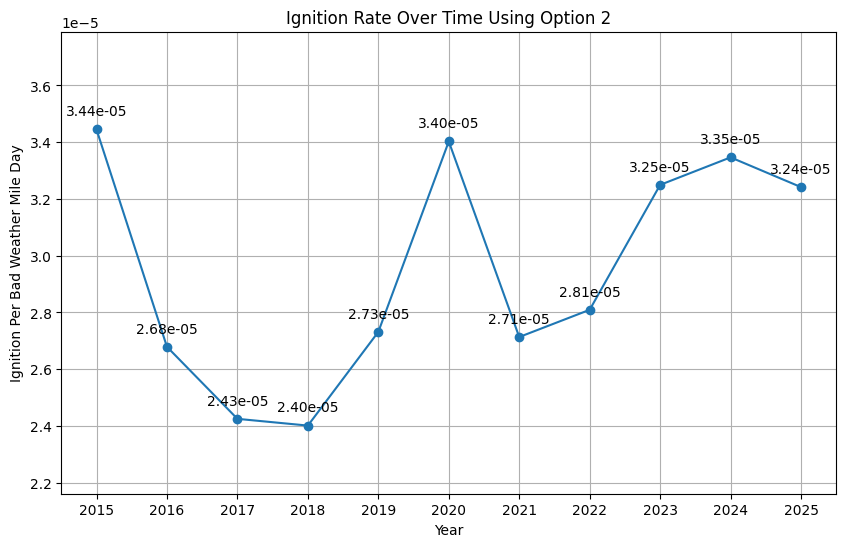

In [532]:
# Create a line plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(res_df['Year'], res_df['Ignition Ratio'], marker='o')
ax.set_title('Ignition Rate Over Time Using Option 2')
ax.set_xlabel('Year')
ax.set_ylabel('Ignition Per Bad Weather Mile Day')
# annotate the points
for i, txt in enumerate(res_df['Ignition Ratio']):
    ax.annotate(f"{txt:.2e}", (res_df['Year'][i], res_df['Ignition Ratio'][i]), textcoords="offset points", xytext=(0,10), ha='center')
# make y max
ax.set_ylim(res_df['Ignition Ratio'].min() * 0.9, res_df['Ignition Ratio'].max() * 1.1)
plt.xticks(res_df['Year'])
plt.grid()
plt.show()

In [536]:
# create a result table
table = []
custom_weight = False # Change to True to use customized weights
custom_std = True # Change to True to use customized std
for yr in range(2020, 2027):
    start, end = yr-5, yr-1
    # filter the data for the last 5 years
    filtered_data = res_df[(res_df['Year'] >= start) & (res_df['Year'] <= end)]
    # assign weights to first, second and third year
    # weights = [0.1, 0.2, 0.7]
    weights = [1/5, 1/5, 1/5, 1/5, 1/5]
    if custom_weight:
        weights = [0.1, 0.1, 0.1, 0.1, 0.6]
    filtered_data['weights'] = weights
    # calculate the weighted average of Ignition Ratio
    weighted_avg = (filtered_data['Ignition Ratio'] * filtered_data['weights']).sum() / filtered_data['weights'].sum()
    target = weighted_avg
    # get the standard deviation of Ignition Ratio and multiply by 1.5 to get bound
    bound = filtered_data['Ignition Ratio'].std() * 1.5
    if custom_std:
        filtered_temp = res_df[res_df['Year'] <= end]
        bound = filtered_temp['Ignition Ratio'].std() * 1.5
    # get p80 by adding the bound to the ratio
    p80 = target + bound
    # get p20 by subtracting the bound from the ratio
    p20 = target - bound
    # get the actual ratio for the current year
    actual = res_df[res_df['Year'] == yr]['Ignition Ratio'].values
    if actual.size == 0:
        actual = [0]
    # append the result to the table
    table.append({
        'Year': yr,
        'Actual': actual[0],
        'P20': p20, 
        'Target': target,
        'P80': p80,
        'Bound': bound
    })
# convert the table to a DataFrame
result_table = pd.DataFrame(table)
result_table

C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1423374421.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weights'] = weights
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1423374421.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weights'] = weights
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1423374421.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Year,Actual,P20,Target,P80,Bound
0,2020,0.000034,0.000021,0.000027,0.000034,0.000006
1,2021,0.000027,0.000020,0.000027,0.000034,0.000007
2,2022,0.000028,0.000021,0.000027,0.000034,0.000006
3,2023,0.000032,0.000022,0.000028,0.000034,0.000006
4,2024,0.000033,0.000024,0.000030,0.000036,0.000006
5,2025,0.000032,0.000025,0.000031,0.000037,0.000006
6,2026,0.000000,0.000025,0.000031,0.000037,0.000006


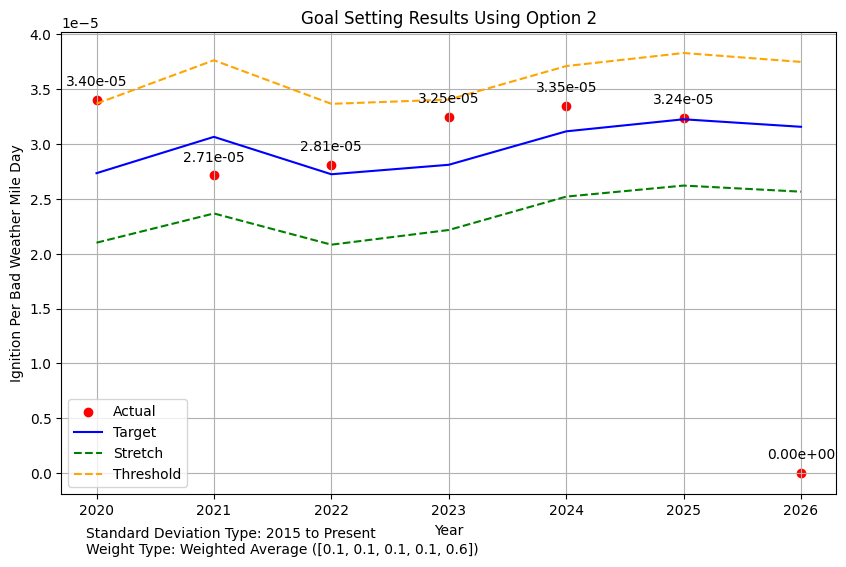

In [516]:
# plot the result table
fig, ax = plt.subplots(figsize=(10, 6))
# draw x points only for Actual
ax.scatter(result_table['Year'], result_table['Actual'], color='red', label='Actual')
# draw solid line for Target
ax.plot(result_table['Year'], result_table['Target'], color='blue', label='Target')
# draw dotted line for P20 and P80
ax.plot(result_table['Year'], result_table['P20'], color='green', linestyle='--', label='Stretch')
ax.plot(result_table['Year'], result_table['P80'], color='orange', linestyle='--', label='Threshold')
# annotate the actual
for i, txt in enumerate(result_table['Actual']):
    ax.annotate(f"{txt:.2e}", (result_table['Year'][i], result_table['Actual'][i]), textcoords="offset points", xytext=(0,10), ha='center')
weight_type = "Unweighted Average"
std_type = "5 Years"
if custom_weight:
    weight_type = f"Weighted Average ({weights})"
if custom_std:
    std_type = "2015 to Present"
ax.set_title(f'Goal Setting Results Using Option 2')
ax.set_xlabel('Year')
ax.set_ylabel('Ignition Per Bad Weather Mile Day')
# add legend
ax.legend()
# add text to the bottom
plt.figtext(0.15, 0.01, f"Standard Deviation Type: {std_type}\nWeight Type: {weight_type}", fontsize=10)
plt.xticks(result_table['Year'])
plt.grid()
plt.show()

### Read Ignition File to Generate Colored Matrix

In [271]:
# get the ignition data
# read list of ignitions with FCZ mapped
ignitions = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions = ignitions.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions['Year'] = pd.to_datetime(ignitions['Date']).dt.year
# keep only SCE involved ignitions
ignitions = ignitions[ignitions['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# ignore rows that have open status
ignitions = ignitions[~ignitions['Status'].str.contains('open', case=False, na=False)]
# keep only reportable ignitions
ignitions = ignitions[ignitions['CPUC Reportable']==1]
# keep only HFRA ignitions
ignitions = ignitions[ignitions['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions.loc[ignitions['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'
# change date format
ignitions['Date'] = pd.to_datetime(ignitions['Date']).dt.strftime('%Y-%m-%d')
# from 2017 onward
ignitions = ignitions[ignitions['Year'] >= 2017]
# before 2025
ignitions = ignitions[ignitions['Year'] < 2025]

# group by Date and Circuit_ID
ignitions_count_agg = ignitions.groupby(['Date','Circuit_ID']).agg({'Event_ID': 'count',}).reset_index().rename(columns={'Event_ID': 'Ignition_Count', 'Circuit_ID':'Circuit FLOC'})
ignitions_count_agg

,Date,Circuit FLOC,Ignition_Count
0,2017-01-13,ED-15922,1
1,2017-03-15,ED-12960,1
2,2017-03-17,ED-08795,1
3,2017-04-16,ED-13791,1
4,2017-04-23,ED-08795,1
...,...,...,...
307,2024-11-09,ED-14005,1
308,2024-11-15,ED-03890,1
309,2024-12-01,ED-02674,1
310,2024-12-04,ET-00069,1


In [272]:
# create a copy of ignitions_agg data 
ignitions_agg = ignitions_count_agg.copy()
# map Circuit FLOC to Circuit Name
ignitions_agg = pd.merge(ignitions_agg, circuitlengths_map, on='Circuit FLOC', how='left', validate='m:1')
# reread circuit lengths file
circuitlengths2 = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Q1_2025-_HFRA_Conductor_SumStat_Circuit.xlsx")
# filter only for ones where ignitions_agg Circuit Name is Null
circuitlengths2 = circuitlengths2[circuitlengths2['Circuit FLOC'].isin(ignitions_agg[ignitions_agg['Circuit Name'].isna()]['Circuit FLOC'].unique())]
circuitlengths2_hfra = circuitlengths2[circuitlengths2['HFRA Tier'].notna()]
# group by Circuit FLOC and Circuit Name, summing Circuit Miles
circuitlengths2_hfra = circuitlengths2_hfra.groupby(['Circuit FLOC', 'Circuit Name'])['Circuit Miles'].sum().reset_index()
circuitlengths2_nonhfra = circuitlengths2[circuitlengths2['HFRA Tier'].isna()]
# group by Circuit FLOC and Circuit Name, summing Circuit Miles
circuitlengths2_nonhfra = circuitlengths2_nonhfra.groupby(['Circuit FLOC', 'Circuit Name'])['Circuit Miles'].sum().reset_index()
# merge circuitlengths2_hfra with ignitions_agg
ignitions_agg = pd.merge(ignitions_agg, circuitlengths2_hfra, on='Circuit FLOC', how='left', validate='m:1', suffixes=('', '_y'))
# merge circuitlengths2_nonhfra with ignitions_agg
ignitions_agg = pd.merge(ignitions_agg, circuitlengths2_nonhfra, on='Circuit FLOC', how='left', validate='m:1', suffixes=('', '_nonhfra'))
# fill NaN values in Circuit Name with Circuit Name_y or Circuit Name_nonhfra
ignitions_agg['Circuit Name'] = ignitions_agg['Circuit Name'].fillna(ignitions_agg['Circuit Name_y']).fillna(ignitions_agg['Circuit Name_nonhfra'])
# fill NaN values in Circuit Miles with Circuit Miles_y or Circuit Miles_nonhfra
ignitions_agg['Circuit Miles'] = ignitions_agg['Circuit Miles'].fillna(ignitions_agg['Circuit Miles_y']).fillna(ignitions_agg['Circuit Miles_nonhfra'])
# drop unnecessary columns
ignitions_agg = ignitions_agg.drop(columns=['Circuit Name_y', 'Circuit Miles_y', 'Circuit Name_nonhfra', 'Circuit Miles_nonhfra'])
# get circuit data
all_circuit_data = distribution_data[['Date','id', fuel_var]].copy()
# create a rolling mean column
all_circuit_data[f'{fuel_var}_rolling'] = all_circuit_data[fuel_var].rolling(window=14, min_periods=1).mean()
# rename columns
all_circuit_data = all_circuit_data.rename(columns={
    'id': 'Circuit Name',
    'time': 'Date',
})
# # make sure Circuit Name is uppercase
all_circuit_data['Circuit Name'] = all_circuit_data['Circuit Name'].str.upper()
# split the Circuit Name from _
# make sure Date is in the correct format
all_circuit_data['Date'] = pd.to_datetime(all_circuit_data['Date']).dt.strftime('%Y-%m-%d')
# keep only ones before 2025
all_circuit_data = all_circuit_data[all_circuit_data['Date'] < '2025-01-01']
# split Circuit Name by _ and keep the first part
all_circuit_data['Circuit Name'] = all_circuit_data['Circuit Name'].str.split('_').str[0]
# drop duplicates
all_circuit_data = all_circuit_data.drop_duplicates(subset=['Circuit Name', 'Date'])
# # read forecast circuit data
# forecast_circuit_2025 = pd.read_csv("CircuitLevelData/Forecast_Circuit_20250715.csv")
# # concatenate forecast circuit data with all_circuit_data
# all_circuit_data = pd.concat([all_circuit_data, forecast_circuit_2025], ignore_index=True)
# convert Date to string
all_circuit_data['Date'] = pd.to_datetime(all_circuit_data['Date']).dt.strftime('%Y-%m-%d')
# merge all_circuit_data with ignitions_agg
ignitions_agg = pd.merge(ignitions_agg, all_circuit_data[['Circuit Name', 'Date', fuel_var,f'{fuel_var}_rolling']], on=['Circuit Name', 'Date'], how='left', validate='1:1')
# change where circuit floc says ET-4090 and change to ET-01503
ignitions_agg.loc[ignitions_agg['Circuit FLOC'] == 'ET-4090', 'Circuit FLOC'] = 'ET-01503'
ignitions_agg.loc[ignitions_agg['Circuit FLOC'] == 'ET-01503','Circuit Name'] = 'KAWEAH 1 2 3-KAWGEN-LEMON COVE-THREE RIV'
# ignore the transmission circuits
ignitions_agg = ignitions_agg[~ignitions_agg['Circuit FLOC'].str.contains('ET', case=False, na=False)]
ignitions_agg

,Date,Circuit FLOC,Ignition_Count,Circuit Name,Circuit Miles,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling
0,2017-01-13,ED-15922,1,SAUNDERS,67.880898,0.098560,0.153875
1,2017-03-15,ED-12960,1,OAK GLEN,29.485186,0.057347,0.070275
2,2017-03-17,ED-08795,1,HUCKLEBERRY,27.306673,0.072122,0.089106
3,2017-04-16,ED-13791,1,PATRICIA,65.958273,0.119491,0.086009
4,2017-04-23,ED-08795,1,HUCKLEBERRY,27.306673,0.104686,0.060886
...,...,...,...,...,...,...,...
305,2024-11-06,ED-08707,1,HOSS,10.731380,0.779988,0.828476
307,2024-11-09,ED-14005,1,PHEASANT,12.020157,0.846953,0.830883
308,2024-11-15,ED-03890,1,CONCEPCION,32.905882,0.491622,0.660032
309,2024-12-01,ED-02674,1,CALGROVE,26.129070,0.728085,0.708458


In [273]:
# create another res_df 
res_df2 = all_circuit_data.copy()
# merge res_df2 with circuitsmap
res_df2 = pd.merge(res_df2, circuitlengths_map, on='Circuit Name', how='left', validate='m:1')
res_df2

,Date,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Circuit FLOC,Circuit Miles
0,2015-01-01,HI LINE,0.265334,0.265334,ED-08427,25.181100
1,2015-01-02,HI LINE,0.274315,0.269825,ED-08427,25.181100
2,2015-01-03,HI LINE,0.267696,0.269115,ED-08427,25.181100
3,2015-01-04,HI LINE,0.265099,0.268111,ED-08427,25.181100
4,2015-01-05,HI LINE,0.306010,0.275691,ED-08427,25.181100
...,...,...,...,...,...,...
14378203,2024-12-27,STROSNIDER,0.306157,0.339235,ED-17122,15.212386
14378204,2024-12-28,STROSNIDER,0.286921,0.333205,ED-17122,15.212386
14378205,2024-12-29,STROSNIDER,0.277896,0.327431,ED-17122,15.212386
14378206,2024-12-30,STROSNIDER,0.304461,0.325962,ED-17122,15.212386


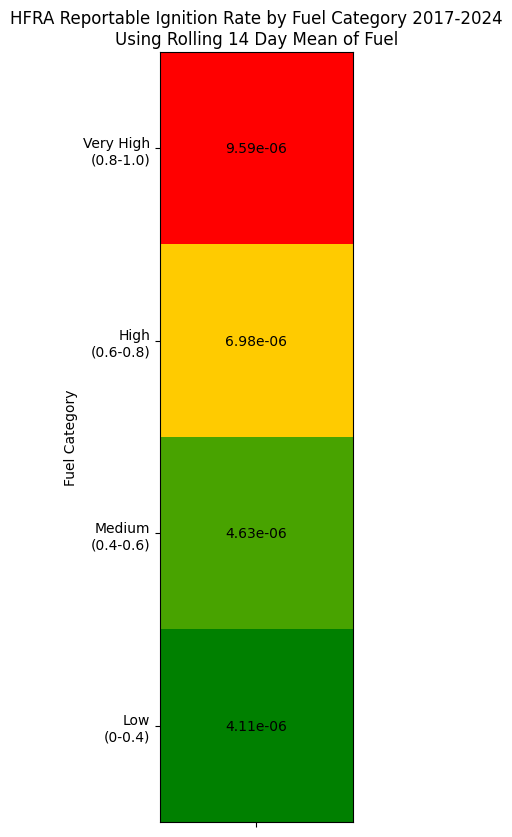

In [274]:
# create an aggregated copy of ignitions_agg and res_df2
ignitions_agg_agg = ignitions_agg.copy()
res_df2_agg = res_df2.copy()
# categorize fuel types
agg_fuel1, agg_fuel2, agg_fuel3 = 0.8, 0.6, 0.4
ignition_cond = [ignitions_agg_agg[f"{fuel_var}_rolling"] >= agg_fuel1, 
                 (ignitions_agg_agg[f"{fuel_var}_rolling"] < agg_fuel1) & (ignitions_agg_agg[f"{fuel_var}_rolling"] >= agg_fuel2),
                 (ignitions_agg_agg[f"{fuel_var}_rolling"] < agg_fuel2) & (ignitions_agg_agg[f"{fuel_var}_rolling"] >= agg_fuel3),
                 ignitions_agg_agg[f"{fuel_var}_rolling"] < agg_fuel3]
ignition_choices = [f"{agg_fuel1}-1.0", f"{agg_fuel2}-{agg_fuel1}", f"{agg_fuel3}-{agg_fuel2}", f"0-{agg_fuel3}"]
res_df2_cond = [res_df2_agg[f"{fuel_var}_rolling"] >= agg_fuel1, 
                 (res_df2_agg[f"{fuel_var}_rolling"] < agg_fuel1) & (res_df2_agg[f"{fuel_var}_rolling"] >= agg_fuel2),
                 (res_df2_agg[f"{fuel_var}_rolling"] < agg_fuel2) & (res_df2_agg[f"{fuel_var}_rolling"] >= agg_fuel3),
                 res_df2_agg[f"{fuel_var}_rolling"] < agg_fuel3]
res_df2_choices = [f"{agg_fuel1}-1.0", f"{agg_fuel2}-{agg_fuel1}", f"{agg_fuel3}-{agg_fuel2}", f"0-{agg_fuel3}"]
ignitions_agg_agg['Fuel Category'] = np.select(ignition_cond, ignition_choices, default=ignition_choices[-1])
res_df2_agg['Fuel Category'] = np.select(res_df2_cond, res_df2_choices, default=res_df2_choices[-1])
# group ignitions_agg_agg by Fuel Category, take sum of Ignition Count
ignitions_agg_grouped = ignitions_agg_agg.groupby('Fuel Category')['Ignition_Count'].sum().reset_index()
# group res_df2_agg by Fuel Category, take sum of Circuit Miles
res_df2_grouped = res_df2_agg.groupby('Fuel Category')['Circuit Miles'].sum().reset_index()
# merge ignitions_agg_grouped and res_df2_grouped on Fuel Category
merged_grouped = pd.merge(ignitions_agg_grouped, res_df2_grouped, on='Fuel Category', how='outer')
# Calculate Ignition Rate
merged_grouped['Ignition Rate'] = merged_grouped['Ignition_Count'] / merged_grouped['Circuit Miles']
# Create an array for Ignition Rate
ignition_rate_array = np.array(merged_grouped['Ignition Rate']).reshape(4,1)
# reverse the array
ignition_rate_array = np.flip(ignition_rate_array, axis=0)
ignition_rate_array
# draw a matrix for the rates
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['green', 'yellow', 'orange', 'red']
cmap2 = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)
colors = cmap2(ignition_rate_array.reshape(-1, 1))
sm = ScalarMappable(cmap=cmap2, norm=plt.Normalize(0, ignition_rate_array.max()))
sm.set_array([])
im = ax.imshow(ignition_rate_array, cmap=cmap2)

# add ticks
# ax.set_xticks(np.arange(len(wind_cats)), )
# create a category label list
word_choices = ["Very High", "High", "Medium", "Low"]
fuel_categories = [f"{word}" + f"\n({res_choice})" for word, res_choice in zip(word_choices, res_df2_choices)]
ax.set_xticks(np.arange(1), labels=[''])
ax.set_yticks(np.arange(len(res_df2_choices)), labels=fuel_categories)
for i in range(ignition_rate_array.shape[0]):
    for j in range(ignition_rate_array.shape[1]):
        text = ax.text(j, i, f"{ignition_rate_array[i, j]:.2e}", ha='center', va='center', color='black')  
# # set x label
# ax.set_xlabel('Wind Category')
# set y label
ax.set_ylabel('Fuel Category')
# set title
ax.set_title('HFRA Reportable Ignition Rate by Fuel Category 2017-2024\nUsing Rolling 14 Day Mean of Fuel')
plt.show()

In [275]:
res_df2_agg

,Date,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Circuit FLOC,Circuit Miles,Fuel Category
0,2015-01-01,HI LINE,0.265334,0.265334,ED-08427,25.181100,0-0.4
1,2015-01-02,HI LINE,0.274315,0.269825,ED-08427,25.181100,0-0.4
2,2015-01-03,HI LINE,0.267696,0.269115,ED-08427,25.181100,0-0.4
3,2015-01-04,HI LINE,0.265099,0.268111,ED-08427,25.181100,0-0.4
4,2015-01-05,HI LINE,0.306010,0.275691,ED-08427,25.181100,0-0.4
...,...,...,...,...,...,...,...
14378203,2024-12-27,STROSNIDER,0.306157,0.339235,ED-17122,15.212386,0-0.4
14378204,2024-12-28,STROSNIDER,0.286921,0.333205,ED-17122,15.212386,0-0.4
14378205,2024-12-29,STROSNIDER,0.277896,0.327431,ED-17122,15.212386,0-0.4
14378206,2024-12-30,STROSNIDER,0.304461,0.325962,ED-17122,15.212386,0-0.4


In [276]:
# read transmission circuits
bulktrans = pd.read_csv("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/BulkTrans_2017-2024.csv", usecols=['time','id',fuel_var])
subtrans = pd.read_csv("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/SubTrans_2017-2024.csv", usecols=['time','id',fuel_var])

Strings for Transmission for ESIR Events:

correction-cummings | gould-sylmar | moorpark-royal | bailey-neenach | eagle rock-sylmar | mesa-vincent no. 2

subtrans | bulktrans | subtrans | subtrans | bulktrans | bulktrans 

BANDUCCI-CORRECTION-CUMMINGS_49 | GOULD-SYLMAR_168 | MOORPARK-ROYAL NO. 2_103 | BAILEY-NEENACH-WESTPAC_59 | EAGLE ROCK-SYLMAR_168 | MESA-VINCENT NO. 2_165

In [277]:
# calculate the rolling 14 day mean using fuel_var
bulktrans[f"{fuel_var}_rolling"] = bulktrans[fuel_var].rolling(window=14, min_periods=1).mean()
subtrans[f"{fuel_var}_rolling"] = subtrans[fuel_var].rolling(window=14, min_periods=1).mean()
# create a date column
bulktrans['Date'] = pd.to_datetime(bulktrans['time']).dt.strftime('%Y-%m-%d')
subtrans['Date'] = pd.to_datetime(subtrans['time']).dt.strftime('%Y-%m-%d')
# rename id to Circuit Name
bulktrans = bulktrans.rename(columns={'id': 'Circuit Name'})
subtrans = subtrans.rename(columns={'id': 'Circuit Name'})

In [381]:
bulktrans[bulktrans['Circuit Name'].str.contains('mesa-vincent no. 2',case=False,na=False)]

,time,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Date
406297,2017-01-01T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.202228,0.660515,2017-01-01
406298,2017-01-02T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.177049,0.616590,2017-01-02
406299,2017-01-03T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.195119,0.573908,2017-01-03
406300,2017-01-04T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.208365,0.534432,2017-01-04
406301,2017-01-05T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.152164,0.493035,2017-01-05
...,...,...,...,...,...
926586,2024-12-28T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.628852,0.608742,2024-12-28
926587,2024-12-29T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.637786,0.612821,2024-12-29
926588,2024-12-30T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.626449,0.615327,2024-12-30
926589,2024-12-31T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.627696,0.619971,2024-12-31


In [278]:
bulktrans[(bulktrans['Circuit Name'].str.contains('mesa-vincent no. 2',case=False,na=False)) & 
          (bulktrans['Date'] <= '2024-12-31') & (bulktrans['Date'] >= '2024-12-01')]

,time,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Date
409188,2024-12-01T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.632354,0.602937,2024-12-01
409189,2024-12-02T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.663758,0.602665,2024-12-02
409190,2024-12-03T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.682095,0.606924,2024-12-03
409191,2024-12-04T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.671128,0.606698,2024-12-04
409192,2024-12-05T00:00:00-08:00,MESA-VINCENT NO. 2_165,0.696478,0.605762,2024-12-05
...,...,...,...,...,...
926585,2024-12-27T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.613179,0.606022,2024-12-27
926586,2024-12-28T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.628852,0.608742,2024-12-28
926587,2024-12-29T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.637786,0.612821,2024-12-29
926588,2024-12-30T00:00:00-08:00,MESA-VINCENT NO. 2_153,0.626449,0.615327,2024-12-30


In [279]:
bulktrans

,time,Circuit Name,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Date
0,2017-01-01T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.194957,0.194957,2017-01-01
1,2017-01-02T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.140786,0.167872,2017-01-02
2,2017-01-03T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.136154,0.157299,2017-01-03
3,2017-01-04T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.154159,0.156514,2017-01-04
4,2017-01-05T00:00:00-08:00,SAN ONOFRE-SANTIAGO NO.1_314,0.111151,0.147441,2017-01-05
...,...,...,...,...,...
1256885,2024-12-28T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.492601,0.501895,2024-12-28
1256886,2024-12-29T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.506357,0.499564,2024-12-29
1256887,2024-12-30T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.510836,0.499230,2024-12-30
1256888,2024-12-31T00:00:00-08:00,CELILO - SYLMAR 1000KV DC CA_03,0.541705,0.503910,2024-12-31


In [280]:
# Check ESIR ignitions
# read esir events from Peter
esir_events = pd.read_excel('//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/ESIR_200_ACRES_fromPeter.xlsx')
# rename column
esir_events = esir_events.rename(columns={'Circuit': 'Circuit Name'})
# keep only ones that are 2017 and later
esir_events = esir_events[esir_events['Date'].dt.year >= 2017]
esir_events['Date'] = esir_events['Date'].dt.strftime('%Y-%m-%d')
esir_events = pd.merge(esir_events, res_df2_agg, how='left', on=['Date','Circuit Name'])
# drop the blank fuel categories
esir_events = esir_events[esir_events['Fuel Category'].notna()]
esir_events

,Name of Fire,Structure,Circuit Name,Rough Cause,FIPA ID,Date,Year,Quater,Acres Damaged,Structures Damaged,Structures Destroyed,SCE Allegedly Involved,HFRA,Facility Type,mean_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index_rolling,Circuit FLOC,Circuit Miles,Fuel Category
1,Bodfish,OH-4606836E/OH-4254344E,ERSKINE,Unknown,Pre-FIPA DB,2017-06-10,2017,Q2,206,0.0,0.0,Yes,Tier 3,NaN,0.791163,0.772753,ED-06040,76.068169,0.6-0.8
2,Thomas/Koenigstein,OH-729565E/OH729566E,CASTRO,EFF/W2W,Pre-FIPA DB,2017-12-04,2017,Q4,281893,280.0,1063.0,Yes,Tier 3,NaN,0.902807,0.885960,ED-04632,46.172120,0.8-1.0
3,Creek,NaN,LOPEZ,Unknown,FIPA_2017_1205_0345,2017-12-05,2017,Q4,15619,144.0,60.0,No,Tier 3,Transmission,0.734403,0.733423,ED-10705,29.730529,0.6-0.8
4,Rye,OH-4389254E,NIGHTHAWK,EFF,Pre-FIPA DB,2017-12-05,2017,Q4,6049,3.0,6.0,Yes,Tier 3,NaN,0.737170,0.740874,ED-12711,3.670647,0.6-0.8
5,Liberty,OH-2090695E,CLYDESDALE,EFF,Pre-FIPA DB,2017-12-07,2017,Q4,300,0.0,2.0,Yes,Tier 2,NaN,0.729179,0.708029,ED-03711,8.773618,0.6-0.8
6,Woolsey,NaN,BIG ROCK,EFF,Pre-FIPA DB,2018-11-08,2018,Q4,96949,364.0,1643.0,Yes,Tier 3,NaN,0.704418,0.891922,ED-01630,27.587772,0.8-1.0
7,Tenaja,OH-4532048E,WILDOMAR,Unknown,FIPA_2019_0904_0355,2019-09-04,2019,Q3,1926,2.0,0.0,Yes,Tier 3,Primary,0.939010,0.933461,ED-19383,11.217849,0.8-1.0
10,Maria,OH-1096380E,RAINBOW,Other,FIPA_2019_1031_1815,2019-10-31,2019,Q4,9999,0.0,4.0,No,Tier 3,Primary,0.958337,0.926720,ED-14645,14.930533,0.8-1.0
11,Bobcat,OH-2127468E,JARVIS,CFO - Tree,FIPA_2020_0906_1220,2020-09-06,2020,Q3,115796,47.0,171.0,Yes,Tier 3,Primary,0.968902,0.926623,ED-09150,39.306024,0.8-1.0
12,Silverado,OH-1419541E/OH-1419546E,TAIWAN,Contact Between Third Party Facility on Pole a...,FIPA_2020_1026_0645,2020-10-26,2020,Q4,12466,9.0,3.0,Yes,Tier 3,Primary,0.669040,0.857558,ED-17487,15.805921,0.8-1.0


In [281]:
esir_events[['Name of Fire','Fuel Category']]

,Name of Fire,Fuel Category
1,Bodfish,0.6-0.8
2,Thomas/Koenigstein,0.8-1.0
3,Creek,0.6-0.8
4,Rye,0.6-0.8
5,Liberty,0.6-0.8
6,Woolsey,0.8-1.0
7,Tenaja,0.8-1.0
10,Maria,0.8-1.0
11,Bobcat,0.8-1.0
12,Silverado,0.8-1.0


## Get Cumulative Month over Month

In [282]:
# get month over month performance for circuit
ignitions_data = pd.read_excel("//sce.eix.com/workgroup/SPE_DSA/Charles/IgnitionGoalSettingInput/Ignition_Safari_Connection.xlsx")
# rename columns 
ignitions_data = ignitions_data.rename(columns={'Date/Time':'Date','Circuit Name':'Circuit_Name','Circuit ID':'Circuit_ID','Event ID':'Event_ID'})
# get year column
ignitions_data['Year'] = pd.to_datetime(ignitions_data['Date']).dt.year
# get month column
ignitions_data['Month'] = pd.to_datetime(ignitions_data['Date']).dt.month
# keep only SCE involved ignitions
ignitions_data = ignitions_data[ignitions_data['SCE Involved'].str.contains('yes|inconclusive',case=False,na=False)]
# ignore rows where Status says open
ignitions_data = ignitions_data[~ignitions_data['Status'].str.contains('open', case=False, na=False)]
# keep only reportable ignitions
ignitions_data = ignitions_data[ignitions_data['CPUC Reportable']==1]
# keep only HFRA ignitions
ignitions_data = ignitions_data[ignitions_data['HFRA'].str.contains('T2|T3',na=False)]
# loc row where circuit name has 'banducci' and change Circuit_ID to ET-02156
ignitions_data.loc[ignitions_data['Circuit_Name'].str.contains('banducci', case=False, na=False), 'Circuit_ID'] = 'ET-02156'

# create a copy of the distribution circuit file
distribution_data_cp2 = distribution_data_cp.copy()
# create a month column
distribution_data_cp2['Month'] = pd.to_datetime(distribution_data_cp2['Date']).dt.month
# calculate the rolling 14 day mean
distribution_data_cp2[f'{fuel_var}_rolling'] = distribution_data_cp2[fuel_var].rolling(window=14, min_periods=1).mean()
# recategorize fuel category
distribution_data_cp2['Fuel Category'] = np.where((distribution_data_cp2[f"{fuel_var}_rolling"] >= fuel_val), f'High', 'Low')
# # merge with circuit miles
# distribution_data_cp2 = distribution_data_cp2.merge(circuitlengths_map, on='Circuit Name', how='left')
# # drop empty Circuit Miles
# distribution_data_cp2 = distribution_data_cp2[distribution_data_cp2['Circuit_Miles'].notna()]

# create a cum_sum_list
cumsum_res = []
# loop through 2021-2024
for yr in range(2021, 2026):
    # filter ignitions data for the year
    ignitions_year = ignitions_data[ignitions_data['Year'] == yr]
    # filter distribution circuits for the year
    distribution_year = distribution_data_cp2[distribution_data_cp2['Year'] == yr]
    # keep only High Category in distribution_year
    distribution_year = distribution_year[distribution_year['Fuel Category'] == 'High']
    # group ignitions_year by month, take counts of EventID
    ignitions_year = ignitions_year.groupby('Month').agg(Counts=('Event_ID', 'count')).reset_index()
    # create a general month dataframe
    month_df = pd.DataFrame({'Month': range(1, 13)})
    # merge with ignitions_year
    ignitions_year = month_df.merge(ignitions_year, on='Month', how='left')
    # fill any NaN values with 0
    ignitions_year = ignitions_year.fillna(0)
    # group distribution_year by month, take sum of Circuit Miles
    distribution_year = distribution_year.groupby('Month').agg(Circuit_Miles=('Circuit Miles', 'sum')).reset_index()
    # create a cumsum column
    ignitions_year['CumsumCount'] = ignitions_year['Counts'].cumsum()
    distribution_year['CumsumMiles'] = distribution_year['Circuit_Miles'].cumsum()
    # merge with forecast data
    ignitions_year = ignitions_year.merge(distribution_year, on='Month', how='outer')
    # for CumsumMiles, fillna with the previous value
    ignitions_year['CumsumMiles'] = ignitions_year['CumsumMiles'].fillna(method='ffill')
    # for CumsumCount, fillna with the previous value
    ignitions_year['CumsumCount'] = ignitions_year['CumsumCount'].fillna(method='ffill')
    # calculate ignition rate
    ignitions_year['Cumulative_Ratio'] = ignitions_year['CumsumCount'] / ignitions_year['CumsumMiles']
    # append to results
    cumsum_res.append(ignitions_year)

C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3711748525.py:59: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ignitions_year['CumsumMiles'] = ignitions_year['CumsumMiles'].fillna(method='ffill')
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3711748525.py:61: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ignitions_year['CumsumCount'] = ignitions_year['CumsumCount'].fillna(method='ffill')
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3711748525.py:59: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ignitions_year['CumsumMiles'] = ignitions_year['CumsumMiles'].fillna(method='ffill')
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\3711748525.py:61: FutureWarning: Series.fillna with 'method' is deprecated and wil

In [283]:
cumsum_res[-1]

,Month,Counts,CumsumCount,Circuit_Miles,CumsumMiles,Cumulative_Ratio
0,1,4.0,4.0,439.599707,439.599707,0.009099
1,2,2.0,6.0,NaN,439.599707,0.013649
2,3,1.0,7.0,NaN,439.599707,0.015924
3,4,1.0,8.0,NaN,439.599707,0.018198
4,5,3.0,11.0,NaN,439.599707,0.025023
5,6,6.0,17.0,55724.456708,56164.056415,0.000303
6,7,2.0,19.0,273847.408824,330011.465238,0.000058
7,8,2.0,21.0,306361.210811,636372.676050,0.000033
8,9,0.0,21.0,NaN,636372.676050,0.000033
9,10,0.0,21.0,NaN,636372.676050,0.000033


## Scratch Work

In [284]:
# # save res_df and result table to an excel file
# res_df.to_excel(f"Circuit_Level_Analysis_Distribution_Only_{fuel_val}.xlsx", index=False)
# # add a sheet to the excel file with the result table
# with pd.ExcelWriter(f"Circuit_Level_Analysis_Distribution_Only_{fuel_val}.xlsx", engine='openpyxl', mode='a') as writer:
#     result_table.to_excel(writer, sheet_name='Result Table', index=False)

In [285]:
# # create a result table
# table = []
# for yr in range(2022, 2025):
#     start, end = yr-3, yr-1
#     # filter the data for the last 3 years
#     filtered_data = res_df[(res_df['Year'] >= start) & (res_df['Year'] <= end)]
#     # get the ratio for the last 3 years to obtain target
#     target = filtered_data['Ignition Ratio'].mean()
#     # get the standard deviation of Ignition Ratio and multiply by 1.5 to get bound
#     bound = filtered_data['Ignition Ratio'].std() * 1.5
#     # get p80 by adding the bound to the ratio
#     p80 = target + bound
#     # get p20 by subtracting the bound from the ratio
#     p20 = target - bound
#     # get the actual ratio for the current year
#     actual = res_df[res_df['Year'] == yr]['Ignition Ratio'].values
#     # append the result to the table
#     table.append({
#         'Year': yr,
#         'Actual': actual[0],
#         'P20': p20, 
#         'Target': target,
#         'P80': p80,
#         'Bound': bound
#     })
# # convert the table to a DataFrame
# result_table = pd.DataFrame(table)
# result_table

In [286]:
# read distribution data
distribution_data

,time,id,max_max_fpi_2.0_tdd_fuels_index,mean_max_fpi_2.0_tdd_fuels_index,median_max_fpi_2.0_tdd_fuels_index,p75_max_fpi_2.0_tdd_fuels_index,p90_max_fpi_2.0_tdd_fuels_index,p95_max_fpi_2.0_tdd_fuels_index,max_mean_fpi_2.0_tdd_fuels_index,mean_mean_fpi_2.0_tdd_fuels_index,...,p90_p90_lfpw_using_dew_point_depression,p95_p90_lfpw_using_dew_point_depression,max_p95_lfpw_using_dew_point_depression,mean_p95_lfpw_using_dew_point_depression,median_p95_lfpw_using_dew_point_depression,p75_p95_lfpw_using_dew_point_depression,p90_p95_lfpw_using_dew_point_depression,p95_p95_lfpw_using_dew_point_depression,Date,Year
0,2015-01-01T00:00:00-08:00,HI LINE,0.287345,0.265334,0.265383,0.282467,0.287048,0.287233,0.192295,0.172548,...,0.764036,0.807536,2.244251,0.959767,0.663448,1.358356,2.001346,2.175403,2015-01-01,2015
1,2015-01-02T00:00:00-08:00,HI LINE,0.298353,0.274315,0.271084,0.286612,0.293096,0.294020,0.186456,0.165580,...,0.613063,0.619841,0.740885,0.524927,0.526151,0.637662,0.713337,0.724252,2015-01-02,2015
2,2015-01-03T00:00:00-08:00,HI LINE,0.290336,0.267696,0.261288,0.276733,0.287329,0.287826,0.172443,0.156317,...,0.200463,0.208811,0.416588,0.193335,0.197823,0.211645,0.283680,0.372936,2015-01-03,2015
3,2015-01-04T00:00:00-08:00,HI LINE,0.288494,0.265099,0.266496,0.272691,0.286355,0.287156,0.159368,0.146211,...,1.748444,1.825284,2.603175,0.829329,0.401402,1.031231,2.363874,2.576631,2015-01-04,2015
4,2015-01-05T00:00:00-08:00,HI LINE,0.331302,0.306010,0.312253,0.319900,0.329338,0.330632,0.183952,0.169220,...,2.876004,2.997994,3.685559,2.433482,2.552127,2.876201,3.339849,3.381666,2015-01-05,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382138,2024-12-27T00:00:00-08:00,STROSNIDER,0.356850,0.306157,0.294632,0.319434,0.354444,0.356225,0.316661,0.266713,...,10.377188,11.190470,11.296192,4.341035,3.299156,5.012625,10.377188,11.190470,2024-12-27,2024
14382139,2024-12-28T00:00:00-08:00,STROSNIDER,0.318490,0.286921,0.281609,0.287351,0.315855,0.318211,0.284863,0.251467,...,5.885743,6.253679,6.687046,3.373338,3.179719,4.097660,5.885743,6.253679,2024-12-28,2024
14382140,2024-12-29T00:00:00-08:00,STROSNIDER,0.303039,0.277896,0.284506,0.290719,0.294680,0.295246,0.271280,0.247216,...,7.282709,8.666787,9.183432,4.572004,4.422780,5.253398,7.282709,8.666787,2024-12-29,2024
14382141,2024-12-30T00:00:00-08:00,STROSNIDER,0.342299,0.304461,0.297286,0.328365,0.339061,0.341265,0.316545,0.273253,...,2.859010,3.464509,3.847372,1.315146,0.887706,2.266536,2.859010,3.464509,2024-12-30,2024


## Coming up with Range for Aug-Dec

In [287]:
# get fuel data for july 2024 and july 2025
july_2024 = distribution_data[(distribution_data['Date'] >= '2024-07-01') & (distribution_data['Date'] < '2024-08-01')]
july_2025 = dist_df_forecast[(dist_df_forecast['Date'] >= '2025-07-01') & (dist_df_forecast['Date'] < '2025-08-01')]
# rename id to Circuit Name
july_2024.rename(columns={'id': 'Circuit Name'}, inplace=True)
july_2025.rename(columns={'Circuit': 'Circuit Name','FuelsIndex_max_FPI2':'max_max_fpi_2.0_tdd_fuels_index'}, inplace=True)

C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1659929170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_2024.rename(columns={'id': 'Circuit Name'}, inplace=True)
C:\Users\tongcj\AppData\Local\Temp\ipykernel_43940\1659929170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_2025.rename(columns={'Circuit': 'Circuit Name','FuelsIndex_max_FPI2':'max_max_fpi_2.0_tdd_fuels_index'}, inplace=True)


In [288]:
july_2025

,Datetime,Date,Circuit Name,max_max_fpi_2.0_tdd_fuels_index,LFPwtdd_max_FPI2,Max_Wind,Max_Gust
11153717,2025-07-01 00:00:00,2025-07-01,ABACUS,0.90,0.34,3.06,4.05
11153774,2025-07-01 00:00:00,2025-07-01,ABRAHAM,0.85,0.10,2.91,3.78
11153831,2025-07-01 00:00:00,2025-07-01,ACADEMY,0.83,0.09,2.67,2.83
11153888,2025-07-01 00:00:00,2025-07-01,ACADIAN,0.89,0.30,3.40,3.65
11153945,2025-07-01 00:00:00,2025-07-01,ACAPULCO,0.79,0.26,4.58,5.82
...,...,...,...,...,...,...,...
12986870,2025-07-31 09:00:00,2025-07-31,ZONE,0.80,0.19,3.92,5.67
12986871,2025-07-31 12:00:00,2025-07-31,ZONE,0.85,2.11,10.06,17.96
12986872,2025-07-31 15:00:00,2025-07-31,ZONE,0.87,2.95,10.70,18.99
12986873,2025-07-31 18:00:00,2025-07-31,ZONE,0.88,2.85,10.41,18.40


In [289]:
july_2025[july_2025['Date']=='2025-07-07']

,Datetime,Date,Circuit Name,max_max_fpi_2.0_tdd_fuels_index,LFPwtdd_max_FPI2,Max_Wind,Max_Gust
11548043,2025-07-07 00:00:00,2025-07-07,ABACUS,0.88,0.16,2.14,2.55
11548100,2025-07-07 00:00:00,2025-07-07,ABRAHAM,0.87,0.02,1.24,1.33
11548157,2025-07-07 00:00:00,2025-07-07,ACADEMY,0.83,0.02,1.83,2.20
11548214,2025-07-07 00:00:00,2025-07-07,ACADIAN,0.89,0.59,4.28,4.66
11548271,2025-07-07 00:00:00,2025-07-07,ACAPULCO,0.77,0.15,4.96,5.47
...,...,...,...,...,...,...,...
12073701,2025-07-07 09:00:00,2025-07-07,ZONE,0.77,0.16,4.60,6.92
12073702,2025-07-07 12:00:00,2025-07-07,ZONE,0.82,1.68,9.78,17.58
12073703,2025-07-07 15:00:00,2025-07-07,ZONE,0.83,2.73,11.40,20.19
12073704,2025-07-07 18:00:00,2025-07-07,ZONE,0.85,2.10,10.38,18.41


In [290]:
# group 2024 data by Circuit Name and Date, take the max of FuelsIndex_max_FPI2
july_2024_agg = july_2024.groupby(['Circuit Name', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
# merge with circuit lengths
july_2024_agg = july_2024_agg.merge(circuitlengths_map, left_on='Circuit Name', right_on='Circuit Name', how='left')
# group 2025 data by Circuit and Date, take the max of FuelsIndex_max_FPI2
july_2025_agg = july_2025.groupby(['Circuit Name', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
# merge with circuit lengths
july_2025_agg = july_2025_agg.merge(circuitlengths_map, left_on='Circuit Name', right_on='Circuit Name', how='left')
# make sure 2024 circuits are in 2025 circuits data
july_2024_agg = july_2024_agg[july_2024_agg['Circuit Name'].isin(july_2025_agg['Circuit Name'])]
# categorize fuel data based on cutoff value
high_cutoff = 0.9
med_cutoff = 0.6
# create conditions and choices for categorization
def categorize_fuel(value):
    if value >= high_cutoff:
        return 'High'
    elif value >= med_cutoff:
        return 'Medium'
    else:
        return 'Low'
july_2024_agg['Fuel Category'] = july_2024_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
july_2025_agg['Fuel Category'] = july_2025_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
# group by Fuel Category and get the sum of Circuit Miles
july_2024_agg = july_2024_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
july_2025_agg = july_2025_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
# get the percentage of each Fuel Category
july_2024_agg['Percentage'] = july_2024_agg['Circuit Miles'] / july_2024_agg['Circuit Miles'].sum() * 100
july_2025_agg['Percentage'] = july_2025_agg['Circuit Miles'] / july_2025_agg['Circuit Miles'].sum() * 100
july_2024_agg

,Fuel Category,Circuit Miles,Percentage
0,High,180667.599179,51.096481
1,Low,3718.048476,1.051540
2,Medium,169195.649085,47.851979


In [291]:
july_2025_agg

,Fuel Category,Circuit Miles,Percentage
0,High,166736.717596,47.026859
1,Low,1714.126512,0.483457
2,Medium,186105.514915,52.489685


In [292]:
# get 2024 aggregation for each month from aug-dec
aug_2024 = distribution_data[(distribution_data['Date'] >= '2024-08-01') & (distribution_data['Date'] < '2024-09-01')]
sep_2024 = distribution_data[(distribution_data['Date'] >= '2024-09-01') & (distribution_data['Date'] < '2024-10-01')]
oct_2024 = distribution_data[(distribution_data['Date'] >= '2024-10-01') & (distribution_data['Date'] < '2024-11-01')]
nov_2024 = distribution_data[(distribution_data['Date'] >= '2024-11-01') & (distribution_data['Date'] < '2024-12-01')]
dec_2024 = distribution_data[(distribution_data['Date'] >= '2024-12-01') & (distribution_data['Date'] < '2025-01-01')]
# group by Circuit Name and Date, take the max of FuelsIndex_max_FPI2
aug_2024_agg = aug_2024.groupby(['id', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
sep_2024_agg = sep_2024.groupby(['id', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
oct_2024_agg = oct_2024.groupby(['id', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
nov_2024_agg = nov_2024.groupby(['id', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
dec_2024_agg = dec_2024.groupby(['id', 'Date'])['max_max_fpi_2.0_tdd_fuels_index'].max().reset_index()
# merge with circuit lengths
aug_2024_agg = aug_2024_agg.merge(circuitlengths_map, left_on='id', right_on='Circuit Name', how='left')
sep_2024_agg = sep_2024_agg.merge(circuitlengths_map, left_on='id', right_on='Circuit Name', how='left')
oct_2024_agg = oct_2024_agg.merge(circuitlengths_map, left_on='id', right_on='Circuit Name', how='left')
nov_2024_agg = nov_2024_agg.merge(circuitlengths_map, left_on='id', right_on='Circuit Name', how='left')
dec_2024_agg = dec_2024_agg.merge(circuitlengths_map, left_on='id', right_on='Circuit Name', how='left')
# make sure 2024 circuits are in 2025 circuits data
aug_2024_agg = aug_2024_agg[aug_2024_agg['id'].isin(july_2025['Circuit Name'])]
sep_2024_agg = sep_2024_agg[sep_2024_agg['id'].isin(july_2025['Circuit Name'])]
oct_2024_agg = oct_2024_agg[oct_2024_agg['id'].isin(july_2025['Circuit Name'])]
nov_2024_agg = nov_2024_agg[nov_2024_agg['id'].isin(july_2025['Circuit Name'])]
dec_2024_agg = dec_2024_agg[dec_2024_agg['id'].isin(july_2025['Circuit Name'])]
# categorize fuel data based on cutoff value
aug_2024_agg['Fuel Category'] = aug_2024_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
sep_2024_agg['Fuel Category'] = sep_2024_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
oct_2024_agg['Fuel Category'] = oct_2024_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
nov_2024_agg['Fuel Category'] = nov_2024_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
dec_2024_agg['Fuel Category'] = dec_2024_agg['max_max_fpi_2.0_tdd_fuels_index'].apply(categorize_fuel)
# group by Fuel Category and get the sum of Circuit Miles
aug_2024_agg = aug_2024_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
sep_2024_agg = sep_2024_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
oct_2024_agg = oct_2024_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
nov_2024_agg = nov_2024_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
dec_2024_agg = dec_2024_agg.groupby('Fuel Category').agg({'Circuit Miles': 'sum'}).reset_index()
# get the percentage of each Fuel Category
aug_2024_agg['Percentage'] = aug_2024_agg['Circuit Miles'] / aug_2024_agg['Circuit Miles'].sum() * 100
sep_2024_agg['Percentage'] = sep_2024_agg['Circuit Miles'] / sep_2024_agg['Circuit Miles'].sum() * 100
oct_2024_agg['Percentage'] = oct_2024_agg['Circuit Miles'] / oct_2024_agg['Circuit Miles'].sum() * 100
nov_2024_agg['Percentage'] = nov_2024_agg['Circuit Miles'] / nov_2024_agg['Circuit Miles'].sum() * 100
dec_2024_agg['Percentage'] = dec_2024_agg['Circuit Miles'] / dec_2024_agg['Circuit Miles'].sum() * 100

In [293]:
aug_2024_agg

,Fuel Category,Circuit Miles,Percentage
0,High,239949.814661,67.862700
1,Low,704.684515,0.199299
2,Medium,112926.797564,31.938001


In [294]:
sep_2024_agg

,Fuel Category,Circuit Miles,Percentage
0,High,184892.923556,54.034538
1,Low,806.203797,0.235611
2,Medium,156476.321105,45.729851


In [295]:
oct_2024_agg

,Fuel Category,Circuit Miles,Percentage
0,High,214907.249077,60.780152
1,Low,2440.565875,0.690242
2,Medium,136233.481788,38.529606


In [296]:
nov_2024_agg

,Fuel Category,Circuit Miles,Percentage
0,High,12519.954553,3.658928
1,Low,67757.958985,19.802110
2,Medium,261897.534921,76.538962


In [297]:
dec_2024_agg

,Fuel Category,Circuit Miles,Percentage
0,High,9385.329681,2.654363
1,Low,79258.621169,22.415954
2,Medium,264937.345890,74.929683


## Read Joey's NetCDF File of Precipitation

In [298]:
import xarray  as xr
import netCDF4
import h5netcdf

# load netcdf file
precip_2024 = xr.open_dataset(r"\\sce.eix.com\workgroup\SPE_DSA\DataMarts\ADS\Daily 7 Features - 4CAVA\ADS_daily_2024.nc")

# convert to dataframe
precip_2024 = precip_2024.to_dataframe().reset_index()